In [7]:
import torch

In [8]:
torch.__version__

'1.3.1'

In [9]:
torch.tensor

<function _VariableFunctions.tensor>

In [10]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0,6.0,13.0, 21.0])
t_u = torch.tensor([35.7,55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [11]:
def model(t_u, w, b):
    return w * t_u +b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()


In [12]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [13]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [14]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u,w+delta,b),t_c) -
                        loss_fn(model(t_u,w-delta,b),t_c)) / (2.0 *delta)

In [15]:
lr = 1e-2

In [16]:
w = w - lr * loss_rate_of_change_w

In [17]:
loss_rate_of_change_b = (loss_fn(model(t_u,b+delta,b),t_c) -
                        loss_fn(model(t_u,b-delta,b),t_c)) / (2.0 *delta)
b = b-lr * loss_rate_of_change_b

In [18]:
b

tensor([13.6430])

In [19]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10,5,requires_grad = True)
target = torch.randn(10,5)
output = loss(input, target)
output.backward()

In [20]:
output

tensor(2.2445, grad_fn=<MseLossBackward>)

In [21]:
def dloss_fn(t_p, t_c):
    dsg_diffs = 2* (t_p - t_c)
    return dsg_diffs

def model(t_u, w, b):
    return w * t_u +b

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0
def grad_fn(t_u, t_c, t_p,w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u,w,b)
    dloss_db = dloss_fn(t_p,t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])
    

In [22]:
params = torch.tensor([1.0,0.0])
epochs = 100
lr = 1e-2
for epoch in range(epochs):
    w,b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print("Epoch %d Loss %f"%(epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params:',params)
    print('Grad: ',grad)
    params = params - lr * grad
params
        

Epoch 0 Loss 1763.884644
Params: tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1 Loss 5802484.500000
Params: tensor([-44.1730,  -0.8260])
Grad:  tensor([-261257.4062,   -4598.9707])
Epoch 2 Loss 19408031744.000000
Params: tensor([2568.4011,   45.1637])
Grad:  tensor([15109615.0000,   266155.7188])
Epoch 3 Loss 64915909902336.000000
Params: tensor([-148527.7344,   -2616.3933])
Grad:  tensor([-8.7385e+08, -1.5393e+07])
Epoch 4 Loss 217130439561707520.000000
Params: tensor([8589997.0000,  151310.8750])
Grad:  tensor([5.0539e+10, 8.9023e+08])
Epoch 5 Loss 726257020202974707712.000000
Params: tensor([-4.9680e+08, -8.7510e+06])
Grad:  tensor([-2.9229e+12, -5.1486e+10])
Epoch 6 Loss 2429181687085405986357248.000000
Params: tensor([2.8732e+10, 5.0610e+08])
Grad:  tensor([1.6904e+14, 2.9776e+12])
Epoch 7 Loss 8125117236949438203699396608.000000
Params: tensor([-1.6617e+12, -2.9270e+10])
Grad:  tensor([-9.7764e+15, -1.7221e+14])
Epoch 8 Loss 27176865195881116022129584766976.000000

tensor([nan, nan])

In [23]:
params = torch.tensor([1.0,0.0])
epochs = 100
lr = 1e-4
for epoch in range(epochs):
    w,b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print("Epoch %d Loss %f"%(epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params:',params)
    print('Grad: ',grad)
    params = params - lr * grad
params
        

Epoch 0 Loss 1763.884644
Params: tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1 Loss 323.090546
Params: tensor([ 0.5483, -0.0083])
Grad:  tensor([1859.5493,   35.7843])
Epoch 2 Loss 78.929634
Params: tensor([ 0.3623, -0.0118])
Grad:  tensor([765.4666,  16.5122])
Epoch 3 Loss 37.552845
Params: tensor([ 0.2858, -0.0135])
Grad:  tensor([315.0790,   8.5787])
Epoch 4 Loss 30.540285
Params: tensor([ 0.2543, -0.0143])
Grad:  tensor([129.6733,   5.3127])
Epoch 5 Loss 29.351152
Params: tensor([ 0.2413, -0.0149])
Grad:  tensor([53.3496,  3.9682])
Epoch 6 Loss 29.148882
Params: tensor([ 0.2360, -0.0153])
Grad:  tensor([21.9304,  3.4148])
Epoch 7 Loss 29.113848
Params: tensor([ 0.2338, -0.0156])
Grad:  tensor([8.9964, 3.1869])
Epoch 8 Loss 29.107145
Params: tensor([ 0.2329, -0.0159])
Grad:  tensor([3.6721, 3.0930])
Epoch 9 Loss 29.105242
Params: tensor([ 0.2325, -0.0162])
Grad:  tensor([1.4803, 3.0544])
Epoch 10 Loss 29.104168
Params: tensor([ 0.2324, -0.0166])
Grad:  tensor([0.578

Params: tensor([ 0.2327, -0.0401])
Grad:  tensor([-0.0533,  3.0232])
Epoch 89 Loss 29.031805
Params: tensor([ 0.2327, -0.0405])
Grad:  tensor([-0.0533,  3.0231])
Epoch 90 Loss 29.030895
Params: tensor([ 0.2327, -0.0408])
Grad:  tensor([-0.0532,  3.0231])
Epoch 91 Loss 29.029976
Params: tensor([ 0.2327, -0.0411])
Grad:  tensor([-0.0532,  3.0230])
Epoch 92 Loss 29.029066
Params: tensor([ 0.2327, -0.0414])
Grad:  tensor([-0.0533,  3.0230])
Epoch 93 Loss 29.028151
Params: tensor([ 0.2327, -0.0417])
Grad:  tensor([-0.0532,  3.0229])
Epoch 94 Loss 29.027235
Params: tensor([ 0.2327, -0.0420])
Grad:  tensor([-0.0532,  3.0229])
Epoch 95 Loss 29.026323
Params: tensor([ 0.2327, -0.0423])
Grad:  tensor([-0.0533,  3.0228])
Epoch 96 Loss 29.025410
Params: tensor([ 0.2327, -0.0426])
Grad:  tensor([-0.0533,  3.0227])
Epoch 97 Loss 29.024494
Params: tensor([ 0.2327, -0.0429])
Grad:  tensor([-0.0533,  3.0227])
Epoch 98 Loss 29.023582
Params: tensor([ 0.2327, -0.0432])
Grad:  tensor([-0.0533,  3.0226])
E

tensor([ 0.2327, -0.0438])

In [24]:
params = torch.tensor([1.0,0.0])
epochs = 100
t_u = 0.1 * t_u
lr = 1e-2
for epoch in range(epochs):
    w,b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print("Epoch %d Loss %f"%(epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params:',params)
    print('Grad: ',grad)
    params = params - lr * grad
params
        

Epoch 0 Loss 80.364342
Params: tensor([1., 0.])
Grad:  tensor([-77.6140, -10.6400])
Epoch 1 Loss 37.574917
Params: tensor([1.7761, 0.1064])
Grad:  tensor([-30.8623,  -2.3864])
Epoch 2 Loss 30.871077
Params: tensor([2.0848, 0.1303])
Grad:  tensor([-12.4631,   0.8587])
Epoch 3 Loss 29.756193
Params: tensor([2.2094, 0.1217])
Grad:  tensor([-5.2218,  2.1327])
Epoch 4 Loss 29.507149
Params: tensor([2.2616, 0.1004])
Grad:  tensor([-2.3715,  2.6310])
Epoch 5 Loss 29.392458
Params: tensor([2.2853, 0.0740])
Grad:  tensor([-1.2492,  2.8241])
Epoch 6 Loss 29.298828
Params: tensor([2.2978, 0.0458])
Grad:  tensor([-0.8071,  2.8970])
Epoch 7 Loss 29.208717
Params: tensor([2.3059, 0.0168])
Grad:  tensor([-0.6325,  2.9227])
Epoch 8 Loss 29.119417
Params: tensor([ 2.3122, -0.0124])
Grad:  tensor([-0.5633,  2.9298])
Epoch 9 Loss 29.030487
Params: tensor([ 2.3178, -0.0417])
Grad:  tensor([-0.5355,  2.9295])
Epoch 10 Loss 28.941875
Params: tensor([ 2.3232, -0.0710])
Grad:  tensor([-0.5240,  2.9264])
Epoch

Params: tensor([ 2.7014, -2.2114])
Grad:  tensor([-0.4529,  2.5640])
Epoch 89 Loss 22.813547
Params: tensor([ 2.7060, -2.2370])
Grad:  tensor([-0.4522,  2.5597])
Epoch 90 Loss 22.746044
Params: tensor([ 2.7105, -2.2626])
Grad:  tensor([-0.4514,  2.5553])
Epoch 91 Loss 22.678770
Params: tensor([ 2.7150, -2.2882])
Grad:  tensor([-0.4506,  2.5510])
Epoch 92 Loss 22.611717
Params: tensor([ 2.7195, -2.3137])
Grad:  tensor([-0.4499,  2.5466])
Epoch 93 Loss 22.544899
Params: tensor([ 2.7240, -2.3392])
Grad:  tensor([-0.4491,  2.5423])
Epoch 94 Loss 22.478304
Params: tensor([ 2.7285, -2.3646])
Grad:  tensor([-0.4483,  2.5380])
Epoch 95 Loss 22.411938
Params: tensor([ 2.7330, -2.3900])
Grad:  tensor([-0.4476,  2.5337])
Epoch 96 Loss 22.345795
Params: tensor([ 2.7374, -2.4153])
Grad:  tensor([-0.4468,  2.5294])
Epoch 97 Loss 22.279875
Params: tensor([ 2.7419, -2.4406])
Grad:  tensor([-0.4461,  2.5251])
Epoch 98 Loss 22.214186
Params: tensor([ 2.7464, -2.4658])
Grad:  tensor([-0.4453,  2.5208])
E

tensor([ 2.7553, -2.5162])

In [25]:
params = torch.tensor([1.0,0.0])
epochs = 5000

lr = 1e-4
for epoch in range(epochs):
    w,b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print("Epoch %d Loss %f"%(epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params:',params)
    print('Grad: ',grad)
    params = params - lr * grad
params
        

Epoch 0 Loss 80.364342
Params: tensor([1., 0.])
Grad:  tensor([-77.6140, -10.6400])
Epoch 1 Loss 79.752480
Params: tensor([1.0078, 0.0011])
Grad:  tensor([-77.1465, -10.5575])
Epoch 2 Loss 79.148026
Params: tensor([1.0155, 0.0021])
Grad:  tensor([-76.6818, -10.4754])
Epoch 3 Loss 78.550858
Params: tensor([1.0231, 0.0032])
Grad:  tensor([-76.2200, -10.3939])
Epoch 4 Loss 77.960892
Params: tensor([1.0308, 0.0042])
Grad:  tensor([-75.7609, -10.3128])
Epoch 5 Loss 77.378052
Params: tensor([1.0383, 0.0052])
Grad:  tensor([-75.3046, -10.2323])
Epoch 6 Loss 76.802254
Params: tensor([1.0459, 0.0063])
Grad:  tensor([-74.8511, -10.1522])
Epoch 7 Loss 76.233414
Params: tensor([1.0534, 0.0073])
Grad:  tensor([-74.4004, -10.0727])
Epoch 8 Loss 75.671417
Params: tensor([1.0608, 0.0083])
Grad:  tensor([-73.9523,  -9.9936])
Epoch 9 Loss 75.116219
Params: tensor([1.0682, 0.0093])
Grad:  tensor([-73.5070,  -9.9150])
Epoch 10 Loss 74.567734
Params: tensor([1.0755, 0.0103])
Grad:  tensor([-73.0644,  -9.83

Params: tensor([1.5315, 0.0669])
Grad:  tensor([-45.6593,  -4.9997])
Epoch 89 Loss 46.869946
Params: tensor([1.5361, 0.0674])
Grad:  tensor([-45.3856,  -4.9514])
Epoch 90 Loss 46.662136
Params: tensor([1.5406, 0.0679])
Grad:  tensor([-45.1135,  -4.9034])
Epoch 91 Loss 46.456837
Params: tensor([1.5451, 0.0684])
Grad:  tensor([-44.8431,  -4.8557])
Epoch 92 Loss 46.253998
Params: tensor([1.5496, 0.0689])
Grad:  tensor([-44.5743,  -4.8082])
Epoch 93 Loss 46.053604
Params: tensor([1.5541, 0.0693])
Grad:  tensor([-44.3072,  -4.7611])
Epoch 94 Loss 45.855618
Params: tensor([1.5585, 0.0698])
Grad:  tensor([-44.0416,  -4.7142])
Epoch 95 Loss 45.660030
Params: tensor([1.5629, 0.0703])
Grad:  tensor([-43.7777,  -4.6677])
Epoch 96 Loss 45.466782
Params: tensor([1.5673, 0.0708])
Grad:  tensor([-43.5154,  -4.6214])
Epoch 97 Loss 45.275867
Params: tensor([1.5716, 0.0712])
Grad:  tensor([-43.2547,  -4.5754])
Epoch 98 Loss 45.087246
Params: tensor([1.5760, 0.0717])
Grad:  tensor([-42.9955,  -4.5296])
E

Params: tensor([1.8419, 0.0951])
Grad:  tensor([-27.1112,  -1.7276])
Epoch 176 Loss 35.618088
Params: tensor([1.8446, 0.0952])
Grad:  tensor([-26.9499,  -1.6992])
Epoch 177 Loss 35.545391
Params: tensor([1.8473, 0.0954])
Grad:  tensor([-26.7896,  -1.6709])
Epoch 178 Loss 35.473557
Params: tensor([1.8500, 0.0956])
Grad:  tensor([-26.6304,  -1.6429])
Epoch 179 Loss 35.402580
Params: tensor([1.8527, 0.0957])
Grad:  tensor([-26.4720,  -1.6149])
Epoch 180 Loss 35.332458
Params: tensor([1.8553, 0.0959])
Grad:  tensor([-26.3146,  -1.5872])
Epoch 181 Loss 35.263168
Params: tensor([1.8579, 0.0961])
Grad:  tensor([-26.1582,  -1.5596])
Epoch 182 Loss 35.194706
Params: tensor([1.8606, 0.0962])
Grad:  tensor([-26.0028,  -1.5322])
Epoch 183 Loss 35.127052
Params: tensor([1.8632, 0.0964])
Grad:  tensor([-25.8482,  -1.5050])
Epoch 184 Loss 35.060215
Params: tensor([1.8657, 0.0965])
Grad:  tensor([-25.6947,  -1.4779])
Epoch 185 Loss 34.994179
Params: tensor([1.8683, 0.0967])
Grad:  tensor([-25.5420,  -

Params: tensor([2.0266, 0.1011])
Grad:  tensor([-16.1849,   0.1980])
Epoch 263 Loss 31.662321
Params: tensor([2.0282, 0.1011])
Grad:  tensor([-16.0899,   0.2147])
Epoch 264 Loss 31.636497
Params: tensor([2.0299, 0.1010])
Grad:  tensor([-15.9955,   0.2314])
Epoch 265 Loss 31.610979
Params: tensor([2.0315, 0.1010])
Grad:  tensor([-15.9017,   0.2479])
Epoch 266 Loss 31.585760
Params: tensor([2.0330, 0.1010])
Grad:  tensor([-15.8084,   0.2643])
Epoch 267 Loss 31.560829
Params: tensor([2.0346, 0.1010])
Grad:  tensor([-15.7157,   0.2806])
Epoch 268 Loss 31.536200
Params: tensor([2.0362, 0.1009])
Grad:  tensor([-15.6235,   0.2969])
Epoch 269 Loss 31.511854
Params: tensor([2.0378, 0.1009])
Grad:  tensor([-15.5319,   0.3130])
Epoch 270 Loss 31.487785
Params: tensor([2.0393, 0.1009])
Grad:  tensor([-15.4409,   0.3290])
Epoch 271 Loss 31.464003
Params: tensor([2.0409, 0.1008])
Grad:  tensor([-15.3504,   0.3449])
Epoch 272 Loss 31.440498
Params: tensor([2.0424, 0.1008])
Grad:  tensor([-15.2605,   

Params: tensor([2.1373, 0.0941])
Grad:  tensor([-9.7483,  1.3305])
Epoch 350 Loss 30.238348
Params: tensor([2.1383, 0.0939])
Grad:  tensor([-9.6923,  1.3404])
Epoch 351 Loss 30.228798
Params: tensor([2.1392, 0.0938])
Grad:  tensor([-9.6367,  1.3501])
Epoch 352 Loss 30.219355
Params: tensor([2.1402, 0.0937])
Grad:  tensor([-9.5814,  1.3598])
Epoch 353 Loss 30.210014
Params: tensor([2.1412, 0.0935])
Grad:  tensor([-9.5265,  1.3695])
Epoch 354 Loss 30.200777
Params: tensor([2.1421, 0.0934])
Grad:  tensor([-9.4719,  1.3791])
Epoch 355 Loss 30.191648
Params: tensor([2.1431, 0.0932])
Grad:  tensor([-9.4176,  1.3886])
Epoch 356 Loss 30.182606
Params: tensor([2.1440, 0.0931])
Grad:  tensor([-9.3636,  1.3981])
Epoch 357 Loss 30.173668
Params: tensor([2.1449, 0.0930])
Grad:  tensor([-9.3100,  1.4075])
Epoch 358 Loss 30.164824
Params: tensor([2.1459, 0.0928])
Grad:  tensor([-9.2567,  1.4169])
Epoch 359 Loss 30.156078
Params: tensor([2.1468, 0.0927])
Grad:  tensor([-9.2037,  1.4262])
Epoch 360 Los

Params: tensor([2.2055, 0.0790])
Grad:  tensor([-5.8908,  2.0074])
Epoch 439 Loss 29.685301
Params: tensor([2.2061, 0.0788])
Grad:  tensor([-5.8582,  2.0131])
Epoch 440 Loss 29.681477
Params: tensor([2.2067, 0.0786])
Grad:  tensor([-5.8258,  2.0187])
Epoch 441 Loss 29.677687
Params: tensor([2.2073, 0.0784])
Grad:  tensor([-5.7936,  2.0244])
Epoch 442 Loss 29.673925
Params: tensor([2.2079, 0.0782])
Grad:  tensor([-5.7617,  2.0300])
Epoch 443 Loss 29.670204
Params: tensor([2.2085, 0.0780])
Grad:  tensor([-5.7299,  2.0355])
Epoch 444 Loss 29.666512
Params: tensor([2.2090, 0.0777])
Grad:  tensor([-5.6983,  2.0411])
Epoch 445 Loss 29.662861
Params: tensor([2.2096, 0.0775])
Grad:  tensor([-5.6669,  2.0465])
Epoch 446 Loss 29.659235
Params: tensor([2.2102, 0.0773])
Grad:  tensor([-5.6357,  2.0520])
Epoch 447 Loss 29.655645
Params: tensor([2.2107, 0.0771])
Grad:  tensor([-5.6046,  2.0574])
Epoch 448 Loss 29.652092
Params: tensor([2.2113, 0.0769])
Grad:  tensor([-5.5738,  2.0628])
Epoch 449 Los

Params: tensor([2.2472, 0.0592])
Grad:  tensor([-3.6455,  2.3994])
Epoch 528 Loss 29.445147
Params: tensor([2.2476, 0.0590])
Grad:  tensor([-3.6266,  2.4027])
Epoch 529 Loss 29.443262
Params: tensor([2.2479, 0.0587])
Grad:  tensor([-3.6077,  2.4060])
Epoch 530 Loss 29.441378
Params: tensor([2.2483, 0.0585])
Grad:  tensor([-3.5890,  2.4092])
Epoch 531 Loss 29.439516
Params: tensor([2.2486, 0.0583])
Grad:  tensor([-3.5704,  2.4124])
Epoch 532 Loss 29.437666
Params: tensor([2.2490, 0.0580])
Grad:  tensor([-3.5519,  2.4157])
Epoch 533 Loss 29.435820
Params: tensor([2.2494, 0.0578])
Grad:  tensor([-3.5335,  2.4189])
Epoch 534 Loss 29.433985
Params: tensor([2.2497, 0.0575])
Grad:  tensor([-3.5152,  2.4220])
Epoch 535 Loss 29.432173
Params: tensor([2.2501, 0.0573])
Grad:  tensor([-3.4971,  2.4252])
Epoch 536 Loss 29.430357
Params: tensor([2.2504, 0.0570])
Grad:  tensor([-3.4790,  2.4283])
Epoch 537 Loss 29.428566
Params: tensor([2.2508, 0.0568])
Grad:  tensor([-3.4611,  2.4315])
Epoch 538 Los

Params: tensor([2.2734, 0.0368])
Grad:  tensor([-2.3386,  2.6257])
Epoch 617 Loss 29.311115
Params: tensor([2.2736, 0.0365])
Grad:  tensor([-2.3276,  2.6275])
Epoch 618 Loss 29.309893
Params: tensor([2.2738, 0.0362])
Grad:  tensor([-2.3166,  2.6294])
Epoch 619 Loss 29.308657
Params: tensor([2.2741, 0.0360])
Grad:  tensor([-2.3057,  2.6313])
Epoch 620 Loss 29.307436
Params: tensor([2.2743, 0.0357])
Grad:  tensor([-2.2949,  2.6332])
Epoch 621 Loss 29.306215
Params: tensor([2.2745, 0.0355])
Grad:  tensor([-2.2841,  2.6350])
Epoch 622 Loss 29.305000
Params: tensor([2.2748, 0.0352])
Grad:  tensor([-2.2734,  2.6369])
Epoch 623 Loss 29.303789
Params: tensor([2.2750, 0.0349])
Grad:  tensor([-2.2628,  2.6387])
Epoch 624 Loss 29.302582
Params: tensor([2.2752, 0.0347])
Grad:  tensor([-2.2522,  2.6405])
Epoch 625 Loss 29.301378
Params: tensor([2.2754, 0.0344])
Grad:  tensor([-2.2417,  2.6423])
Epoch 626 Loss 29.300177
Params: tensor([2.2757, 0.0341])
Grad:  tensor([-2.2312,  2.6441])
Epoch 627 Los

Params: tensor([2.2905, 0.0128])
Grad:  tensor([-1.5778,  2.7555])
Epoch 706 Loss 29.213182
Params: tensor([2.2907, 0.0125])
Grad:  tensor([-1.5714,  2.7565])
Epoch 707 Loss 29.212172
Params: tensor([2.2908, 0.0122])
Grad:  tensor([-1.5650,  2.7576])
Epoch 708 Loss 29.211170
Params: tensor([2.2910, 0.0120])
Grad:  tensor([-1.5586,  2.7587])
Epoch 709 Loss 29.210167
Params: tensor([2.2912, 0.0117])
Grad:  tensor([-1.5523,  2.7598])
Epoch 710 Loss 29.209167
Params: tensor([2.2913, 0.0114])
Grad:  tensor([-1.5461,  2.7608])
Epoch 711 Loss 29.208168
Params: tensor([2.2915, 0.0111])
Grad:  tensor([-1.5398,  2.7619])
Epoch 712 Loss 29.207161
Params: tensor([2.2916, 0.0108])
Grad:  tensor([-1.5336,  2.7629])
Epoch 713 Loss 29.206169
Params: tensor([2.2918, 0.0106])
Grad:  tensor([-1.5275,  2.7639])
Epoch 714 Loss 29.205172
Params: tensor([2.2919, 0.0103])
Grad:  tensor([-1.5214,  2.7650])
Epoch 715 Loss 29.204174
Params: tensor([2.2921, 0.0100])
Grad:  tensor([-1.5153,  2.7660])
Epoch 716 Los

Grad:  tensor([-1.1461,  2.8273])
Epoch 792 Loss 29.130421
Params: tensor([ 2.3022, -0.0115])
Grad:  tensor([-1.1423,  2.8279])
Epoch 793 Loss 29.129488
Params: tensor([ 2.3023, -0.0118])
Grad:  tensor([-1.1385,  2.8285])
Epoch 794 Loss 29.128559
Params: tensor([ 2.3024, -0.0121])
Grad:  tensor([-1.1347,  2.8292])
Epoch 795 Loss 29.127630
Params: tensor([ 2.3026, -0.0124])
Grad:  tensor([-1.1310,  2.8298])
Epoch 796 Loss 29.126701
Params: tensor([ 2.3027, -0.0127])
Grad:  tensor([-1.1273,  2.8304])
Epoch 797 Loss 29.125774
Params: tensor([ 2.3028, -0.0129])
Grad:  tensor([-1.1236,  2.8310])
Epoch 798 Loss 29.124849
Params: tensor([ 2.3029, -0.0132])
Grad:  tensor([-1.1199,  2.8316])
Epoch 799 Loss 29.123924
Params: tensor([ 2.3030, -0.0135])
Grad:  tensor([-1.1162,  2.8322])
Epoch 800 Loss 29.122992
Params: tensor([ 2.3031, -0.0138])
Grad:  tensor([-1.1126,  2.8328])
Epoch 801 Loss 29.122065
Params: tensor([ 2.3032, -0.0141])
Grad:  tensor([-1.1090,  2.8333])
Epoch 802 Loss 29.121143
P

Grad:  tensor([-0.8877,  2.8685])
Epoch 879 Loss 29.050934
Params: tensor([ 2.3110, -0.0363])
Grad:  tensor([-0.8854,  2.8688])
Epoch 880 Loss 29.050035
Params: tensor([ 2.3110, -0.0366])
Grad:  tensor([-0.8832,  2.8692])
Epoch 881 Loss 29.049135
Params: tensor([ 2.3111, -0.0369])
Grad:  tensor([-0.8810,  2.8695])
Epoch 882 Loss 29.048231
Params: tensor([ 2.3112, -0.0372])
Grad:  tensor([-0.8788,  2.8698])
Epoch 883 Loss 29.047333
Params: tensor([ 2.3113, -0.0375])
Grad:  tensor([-0.8766,  2.8702])
Epoch 884 Loss 29.046429
Params: tensor([ 2.3114, -0.0378])
Grad:  tensor([-0.8744,  2.8705])
Epoch 885 Loss 29.045532
Params: tensor([ 2.3115, -0.0381])
Grad:  tensor([-0.8722,  2.8708])
Epoch 886 Loss 29.044630
Params: tensor([ 2.3116, -0.0383])
Grad:  tensor([-0.8700,  2.8712])
Epoch 887 Loss 29.043730
Params: tensor([ 2.3117, -0.0386])
Grad:  tensor([-0.8679,  2.8715])
Epoch 888 Loss 29.042824
Params: tensor([ 2.3117, -0.0389])
Grad:  tensor([-0.8658,  2.8718])
Epoch 889 Loss 29.041931
P

Grad:  tensor([-0.7351,  2.8910])
Epoch 966 Loss 28.973089
Params: tensor([ 2.3179, -0.0614])
Grad:  tensor([-0.7338,  2.8911])
Epoch 967 Loss 28.972197
Params: tensor([ 2.3180, -0.0617])
Grad:  tensor([-0.7325,  2.8913])
Epoch 968 Loss 28.971306
Params: tensor([ 2.3181, -0.0620])
Grad:  tensor([-0.7312,  2.8915])
Epoch 969 Loss 28.970421
Params: tensor([ 2.3182, -0.0623])
Grad:  tensor([-0.7298,  2.8917])
Epoch 970 Loss 28.969530
Params: tensor([ 2.3182, -0.0626])
Grad:  tensor([-0.7286,  2.8919])
Epoch 971 Loss 28.968641
Params: tensor([ 2.3183, -0.0628])
Grad:  tensor([-0.7273,  2.8920])
Epoch 972 Loss 28.967754
Params: tensor([ 2.3184, -0.0631])
Grad:  tensor([-0.7260,  2.8922])
Epoch 973 Loss 28.966864
Params: tensor([ 2.3185, -0.0634])
Grad:  tensor([-0.7247,  2.8924])
Epoch 974 Loss 28.965975
Params: tensor([ 2.3185, -0.0637])
Grad:  tensor([-0.7234,  2.8926])
Epoch 975 Loss 28.965086
Params: tensor([ 2.3186, -0.0640])
Grad:  tensor([-0.7222,  2.8927])
Epoch 976 Loss 28.964191
P

Epoch 1052 Loss 28.896837
Params: tensor([ 2.3238, -0.0863])
Grad:  tensor([-0.6449,  2.9024])
Epoch 1053 Loss 28.895958
Params: tensor([ 2.3239, -0.0866])
Grad:  tensor([-0.6441,  2.9025])
Epoch 1054 Loss 28.895069
Params: tensor([ 2.3240, -0.0869])
Grad:  tensor([-0.6434,  2.9026])
Epoch 1055 Loss 28.894188
Params: tensor([ 2.3240, -0.0872])
Grad:  tensor([-0.6426,  2.9027])
Epoch 1056 Loss 28.893303
Params: tensor([ 2.3241, -0.0875])
Grad:  tensor([-0.6418,  2.9028])
Epoch 1057 Loss 28.892420
Params: tensor([ 2.3242, -0.0878])
Grad:  tensor([-0.6410,  2.9029])
Epoch 1058 Loss 28.891535
Params: tensor([ 2.3242, -0.0881])
Grad:  tensor([-0.6403,  2.9029])
Epoch 1059 Loss 28.890650
Params: tensor([ 2.3243, -0.0883])
Grad:  tensor([-0.6395,  2.9030])
Epoch 1060 Loss 28.889769
Params: tensor([ 2.3244, -0.0886])
Grad:  tensor([-0.6388,  2.9031])
Epoch 1061 Loss 28.888884
Params: tensor([ 2.3244, -0.0889])
Grad:  tensor([-0.6380,  2.9032])
Epoch 1062 Loss 28.888000
Params: tensor([ 2.3245,

Epoch 1138 Loss 28.820982
Params: tensor([ 2.3291, -0.1113])
Grad:  tensor([-0.5919,  2.9074])
Epoch 1139 Loss 28.820107
Params: tensor([ 2.3292, -0.1116])
Grad:  tensor([-0.5915,  2.9074])
Epoch 1140 Loss 28.819221
Params: tensor([ 2.3293, -0.1119])
Grad:  tensor([-0.5910,  2.9074])
Epoch 1141 Loss 28.818342
Params: tensor([ 2.3293, -0.1122])
Grad:  tensor([-0.5906,  2.9075])
Epoch 1142 Loss 28.817457
Params: tensor([ 2.3294, -0.1125])
Grad:  tensor([-0.5901,  2.9075])
Epoch 1143 Loss 28.816582
Params: tensor([ 2.3294, -0.1128])
Grad:  tensor([-0.5896,  2.9075])
Epoch 1144 Loss 28.815699
Params: tensor([ 2.3295, -0.1130])
Grad:  tensor([-0.5892,  2.9076])
Epoch 1145 Loss 28.814821
Params: tensor([ 2.3296, -0.1133])
Grad:  tensor([-0.5887,  2.9076])
Epoch 1146 Loss 28.813942
Params: tensor([ 2.3296, -0.1136])
Grad:  tensor([-0.5883,  2.9076])
Epoch 1147 Loss 28.813063
Params: tensor([ 2.3297, -0.1139])
Grad:  tensor([-0.5878,  2.9076])
Epoch 1148 Loss 28.812178
Params: tensor([ 2.3297,

Epoch 1224 Loss 28.745399
Params: tensor([ 2.3341, -0.1363])
Grad:  tensor([-0.5603,  2.9086])
Epoch 1225 Loss 28.744520
Params: tensor([ 2.3341, -0.1366])
Grad:  tensor([-0.5600,  2.9086])
Epoch 1226 Loss 28.743645
Params: tensor([ 2.3342, -0.1369])
Grad:  tensor([-0.5597,  2.9086])
Epoch 1227 Loss 28.742769
Params: tensor([ 2.3343, -0.1372])
Grad:  tensor([-0.5594,  2.9086])
Epoch 1228 Loss 28.741890
Params: tensor([ 2.3343, -0.1375])
Grad:  tensor([-0.5591,  2.9086])
Epoch 1229 Loss 28.741014
Params: tensor([ 2.3344, -0.1378])
Grad:  tensor([-0.5588,  2.9086])
Epoch 1230 Loss 28.740137
Params: tensor([ 2.3344, -0.1381])
Grad:  tensor([-0.5586,  2.9086])
Epoch 1231 Loss 28.739260
Params: tensor([ 2.3345, -0.1383])
Grad:  tensor([-0.5583,  2.9086])
Epoch 1232 Loss 28.738380
Params: tensor([ 2.3345, -0.1386])
Grad:  tensor([-0.5580,  2.9086])
Epoch 1233 Loss 28.737505
Params: tensor([ 2.3346, -0.1389])
Grad:  tensor([-0.5578,  2.9086])
Epoch 1234 Loss 28.736633
Params: tensor([ 2.3347,

Epoch 1310 Loss 28.670067
Params: tensor([ 2.3388, -0.1613])
Grad:  tensor([-0.5412,  2.9076])
Epoch 1311 Loss 28.669191
Params: tensor([ 2.3389, -0.1616])
Grad:  tensor([-0.5410,  2.9075])
Epoch 1312 Loss 28.668316
Params: tensor([ 2.3389, -0.1619])
Grad:  tensor([-0.5408,  2.9075])
Epoch 1313 Loss 28.667442
Params: tensor([ 2.3390, -0.1622])
Grad:  tensor([-0.5407,  2.9075])
Epoch 1314 Loss 28.666571
Params: tensor([ 2.3390, -0.1625])
Grad:  tensor([-0.5405,  2.9075])
Epoch 1315 Loss 28.665688
Params: tensor([ 2.3391, -0.1628])
Grad:  tensor([-0.5403,  2.9075])
Epoch 1316 Loss 28.664818
Params: tensor([ 2.3391, -0.1631])
Grad:  tensor([-0.5402,  2.9074])
Epoch 1317 Loss 28.663939
Params: tensor([ 2.3392, -0.1634])
Grad:  tensor([-0.5400,  2.9074])
Epoch 1318 Loss 28.663067
Params: tensor([ 2.3393, -0.1636])
Grad:  tensor([-0.5398,  2.9074])
Epoch 1319 Loss 28.662193
Params: tensor([ 2.3393, -0.1639])
Grad:  tensor([-0.5397,  2.9074])
Epoch 1320 Loss 28.661322
Params: tensor([ 2.3394,

Epoch 1396 Loss 28.594954
Params: tensor([ 2.3434, -0.1863])
Grad:  tensor([-0.5296,  2.9052])
Epoch 1397 Loss 28.594084
Params: tensor([ 2.3435, -0.1866])
Grad:  tensor([-0.5295,  2.9052])
Epoch 1398 Loss 28.593206
Params: tensor([ 2.3435, -0.1869])
Grad:  tensor([-0.5294,  2.9052])
Epoch 1399 Loss 28.592335
Params: tensor([ 2.3436, -0.1872])
Grad:  tensor([-0.5293,  2.9051])
Epoch 1400 Loss 28.591463
Params: tensor([ 2.3436, -0.1875])
Grad:  tensor([-0.5291,  2.9051])
Epoch 1401 Loss 28.590599
Params: tensor([ 2.3437, -0.1878])
Grad:  tensor([-0.5291,  2.9051])
Epoch 1402 Loss 28.589722
Params: tensor([ 2.3437, -0.1881])
Grad:  tensor([-0.5289,  2.9050])
Epoch 1403 Loss 28.588848
Params: tensor([ 2.3438, -0.1883])
Grad:  tensor([-0.5288,  2.9050])
Epoch 1404 Loss 28.587982
Params: tensor([ 2.3438, -0.1886])
Grad:  tensor([-0.5287,  2.9050])
Epoch 1405 Loss 28.587105
Params: tensor([ 2.3439, -0.1889])
Grad:  tensor([-0.5286,  2.9049])
Epoch 1406 Loss 28.586231
Params: tensor([ 2.3440,

Epoch 1482 Loss 28.520067
Params: tensor([ 2.3479, -0.2113])
Grad:  tensor([-0.5224,  2.9021])
Epoch 1483 Loss 28.519196
Params: tensor([ 2.3480, -0.2116])
Grad:  tensor([-0.5223,  2.9021])
Epoch 1484 Loss 28.518324
Params: tensor([ 2.3480, -0.2119])
Grad:  tensor([-0.5222,  2.9020])
Epoch 1485 Loss 28.517456
Params: tensor([ 2.3481, -0.2122])
Grad:  tensor([-0.5222,  2.9020])
Epoch 1486 Loss 28.516584
Params: tensor([ 2.3482, -0.2124])
Grad:  tensor([-0.5221,  2.9020])
Epoch 1487 Loss 28.515718
Params: tensor([ 2.3482, -0.2127])
Grad:  tensor([-0.5221,  2.9019])
Epoch 1488 Loss 28.514849
Params: tensor([ 2.3483, -0.2130])
Grad:  tensor([-0.5220,  2.9019])
Epoch 1489 Loss 28.513977
Params: tensor([ 2.3483, -0.2133])
Grad:  tensor([-0.5219,  2.9018])
Epoch 1490 Loss 28.513109
Params: tensor([ 2.3484, -0.2136])
Grad:  tensor([-0.5219,  2.9018])
Epoch 1491 Loss 28.512239
Params: tensor([ 2.3484, -0.2139])
Grad:  tensor([-0.5218,  2.9018])
Epoch 1492 Loss 28.511372
Params: tensor([ 2.3485,

Epoch 1568 Loss 28.445391
Params: tensor([ 2.3524, -0.2362])
Grad:  tensor([-0.5178,  2.8986])
Epoch 1569 Loss 28.444525
Params: tensor([ 2.3525, -0.2365])
Grad:  tensor([-0.5178,  2.8985])
Epoch 1570 Loss 28.443659
Params: tensor([ 2.3525, -0.2368])
Grad:  tensor([-0.5177,  2.8985])
Epoch 1571 Loss 28.442793
Params: tensor([ 2.3526, -0.2371])
Grad:  tensor([-0.5177,  2.8984])
Epoch 1572 Loss 28.441927
Params: tensor([ 2.3526, -0.2374])
Grad:  tensor([-0.5177,  2.8984])
Epoch 1573 Loss 28.441059
Params: tensor([ 2.3527, -0.2377])
Grad:  tensor([-0.5176,  2.8983])
Epoch 1574 Loss 28.440197
Params: tensor([ 2.3527, -0.2380])
Grad:  tensor([-0.5176,  2.8983])
Epoch 1575 Loss 28.439325
Params: tensor([ 2.3528, -0.2383])
Grad:  tensor([-0.5175,  2.8982])
Epoch 1576 Loss 28.438459
Params: tensor([ 2.3528, -0.2386])
Grad:  tensor([-0.5175,  2.8982])
Epoch 1577 Loss 28.437597
Params: tensor([ 2.3529, -0.2388])
Grad:  tensor([-0.5175,  2.8982])
Epoch 1578 Loss 28.436726
Params: tensor([ 2.3529,

Grad:  tensor([-0.5127,  2.8904])
Epoch 1748 Loss 28.289824
Params: tensor([ 2.3617, -0.2883])
Grad:  tensor([-0.5126,  2.8903])
Epoch 1749 Loss 28.288952
Params: tensor([ 2.3617, -0.2886])
Grad:  tensor([-0.5126,  2.8903])
Epoch 1750 Loss 28.288097
Params: tensor([ 2.3618, -0.2889])
Grad:  tensor([-0.5126,  2.8902])
Epoch 1751 Loss 28.287233
Params: tensor([ 2.3618, -0.2892])
Grad:  tensor([-0.5126,  2.8902])
Epoch 1752 Loss 28.286371
Params: tensor([ 2.3619, -0.2895])
Grad:  tensor([-0.5126,  2.8902])
Epoch 1753 Loss 28.285503
Params: tensor([ 2.3619, -0.2898])
Grad:  tensor([-0.5125,  2.8901])
Epoch 1754 Loss 28.284645
Params: tensor([ 2.3620, -0.2901])
Grad:  tensor([-0.5125,  2.8901])
Epoch 1755 Loss 28.283781
Params: tensor([ 2.3620, -0.2904])
Grad:  tensor([-0.5125,  2.8900])
Epoch 1756 Loss 28.282921
Params: tensor([ 2.3621, -0.2906])
Grad:  tensor([-0.5125,  2.8900])
Epoch 1757 Loss 28.282063
Params: tensor([ 2.3621, -0.2909])
Grad:  tensor([-0.5125,  2.8899])
Epoch 1758 Loss 

Grad:  tensor([-0.5111,  2.8863])
Epoch 1834 Loss 28.215820
Params: tensor([ 2.3661, -0.3132])
Grad:  tensor([-0.5111,  2.8863])
Epoch 1835 Loss 28.214960
Params: tensor([ 2.3661, -0.3135])
Grad:  tensor([-0.5111,  2.8862])
Epoch 1836 Loss 28.214098
Params: tensor([ 2.3662, -0.3138])
Grad:  tensor([-0.5111,  2.8862])
Epoch 1837 Loss 28.213243
Params: tensor([ 2.3662, -0.3140])
Grad:  tensor([-0.5111,  2.8861])
Epoch 1838 Loss 28.212385
Params: tensor([ 2.3663, -0.3143])
Grad:  tensor([-0.5111,  2.8861])
Epoch 1839 Loss 28.211519
Params: tensor([ 2.3663, -0.3146])
Grad:  tensor([-0.5110,  2.8860])
Epoch 1840 Loss 28.210669
Params: tensor([ 2.3664, -0.3149])
Grad:  tensor([-0.5110,  2.8860])
Epoch 1841 Loss 28.209806
Params: tensor([ 2.3664, -0.3152])
Grad:  tensor([-0.5110,  2.8859])
Epoch 1842 Loss 28.208946
Params: tensor([ 2.3665, -0.3155])
Grad:  tensor([-0.5110,  2.8859])
Epoch 1843 Loss 28.208092
Params: tensor([ 2.3665, -0.3158])
Grad:  tensor([-0.5110,  2.8858])
Epoch 1844 Loss 

Grad:  tensor([-0.5100,  2.8822])
Epoch 1920 Loss 28.142036
Params: tensor([ 2.3705, -0.3380])
Grad:  tensor([-0.5100,  2.8821])
Epoch 1921 Loss 28.141186
Params: tensor([ 2.3705, -0.3383])
Grad:  tensor([-0.5100,  2.8821])
Epoch 1922 Loss 28.140326
Params: tensor([ 2.3706, -0.3386])
Grad:  tensor([-0.5100,  2.8820])
Epoch 1923 Loss 28.139467
Params: tensor([ 2.3706, -0.3388])
Grad:  tensor([-0.5100,  2.8820])
Epoch 1924 Loss 28.138617
Params: tensor([ 2.3707, -0.3391])
Grad:  tensor([-0.5099,  2.8819])
Epoch 1925 Loss 28.137756
Params: tensor([ 2.3707, -0.3394])
Grad:  tensor([-0.5099,  2.8819])
Epoch 1926 Loss 28.136896
Params: tensor([ 2.3708, -0.3397])
Grad:  tensor([-0.5099,  2.8818])
Epoch 1927 Loss 28.136042
Params: tensor([ 2.3708, -0.3400])
Grad:  tensor([-0.5099,  2.8818])
Epoch 1928 Loss 28.135187
Params: tensor([ 2.3709, -0.3403])
Grad:  tensor([-0.5099,  2.8817])
Epoch 1929 Loss 28.134331
Params: tensor([ 2.3709, -0.3406])
Grad:  tensor([-0.5099,  2.8817])
Epoch 1930 Loss 

Grad:  tensor([-0.5089,  2.8780])
Epoch 2006 Loss 28.068474
Params: tensor([ 2.3749, -0.3627])
Grad:  tensor([-0.5089,  2.8780])
Epoch 2007 Loss 28.067619
Params: tensor([ 2.3749, -0.3630])
Grad:  tensor([-0.5089,  2.8779])
Epoch 2008 Loss 28.066765
Params: tensor([ 2.3750, -0.3633])
Grad:  tensor([-0.5089,  2.8779])
Epoch 2009 Loss 28.065907
Params: tensor([ 2.3750, -0.3636])
Grad:  tensor([-0.5089,  2.8778])
Epoch 2010 Loss 28.065052
Params: tensor([ 2.3751, -0.3639])
Grad:  tensor([-0.5089,  2.8778])
Epoch 2011 Loss 28.064207
Params: tensor([ 2.3751, -0.3642])
Grad:  tensor([-0.5089,  2.8777])
Epoch 2012 Loss 28.063347
Params: tensor([ 2.3752, -0.3645])
Grad:  tensor([-0.5089,  2.8777])
Epoch 2013 Loss 28.062494
Params: tensor([ 2.3752, -0.3648])
Grad:  tensor([-0.5089,  2.8776])
Epoch 2014 Loss 28.061638
Params: tensor([ 2.3753, -0.3650])
Grad:  tensor([-0.5088,  2.8776])
Epoch 2015 Loss 28.060785
Params: tensor([ 2.3753, -0.3653])
Grad:  tensor([-0.5088,  2.8775])
Epoch 2016 Loss 

Grad:  tensor([-0.5083,  2.8738])
Epoch 2092 Loss 27.995123
Params: tensor([ 2.3792, -0.3875])
Grad:  tensor([-0.5082,  2.8737])
Epoch 2093 Loss 27.994274
Params: tensor([ 2.3793, -0.3878])
Grad:  tensor([-0.5082,  2.8737])
Epoch 2094 Loss 27.993422
Params: tensor([ 2.3793, -0.3881])
Grad:  tensor([-0.5082,  2.8736])
Epoch 2095 Loss 27.992565
Params: tensor([ 2.3794, -0.3883])
Grad:  tensor([-0.5082,  2.8736])
Epoch 2096 Loss 27.991716
Params: tensor([ 2.3794, -0.3886])
Grad:  tensor([-0.5082,  2.8736])
Epoch 2097 Loss 27.990864
Params: tensor([ 2.3795, -0.3889])
Grad:  tensor([-0.5082,  2.8735])
Epoch 2098 Loss 27.990015
Params: tensor([ 2.3795, -0.3892])
Grad:  tensor([-0.5082,  2.8735])
Epoch 2099 Loss 27.989164
Params: tensor([ 2.3796, -0.3895])
Grad:  tensor([-0.5082,  2.8734])
Epoch 2100 Loss 27.988310
Params: tensor([ 2.3796, -0.3898])
Grad:  tensor([-0.5082,  2.8734])
Epoch 2101 Loss 27.987465
Params: tensor([ 2.3797, -0.3901])
Grad:  tensor([-0.5082,  2.8733])
Epoch 2102 Loss 

Grad:  tensor([-0.5073,  2.8696])
Epoch 2178 Loss 27.921986
Params: tensor([ 2.3836, -0.4122])
Grad:  tensor([-0.5072,  2.8696])
Epoch 2179 Loss 27.921141
Params: tensor([ 2.3836, -0.4125])
Grad:  tensor([-0.5072,  2.8696])
Epoch 2180 Loss 27.920286
Params: tensor([ 2.3837, -0.4127])
Grad:  tensor([-0.5072,  2.8695])
Epoch 2181 Loss 27.919439
Params: tensor([ 2.3837, -0.4130])
Grad:  tensor([-0.5072,  2.8695])
Epoch 2182 Loss 27.918591
Params: tensor([ 2.3838, -0.4133])
Grad:  tensor([-0.5072,  2.8694])
Epoch 2183 Loss 27.917742
Params: tensor([ 2.3838, -0.4136])
Grad:  tensor([-0.5072,  2.8694])
Epoch 2184 Loss 27.916893
Params: tensor([ 2.3839, -0.4139])
Grad:  tensor([-0.5072,  2.8693])
Epoch 2185 Loss 27.916040
Params: tensor([ 2.3839, -0.4142])
Grad:  tensor([-0.5071,  2.8693])
Epoch 2186 Loss 27.915194
Params: tensor([ 2.3840, -0.4145])
Grad:  tensor([-0.5071,  2.8692])
Epoch 2187 Loss 27.914343
Params: tensor([ 2.3840, -0.4148])
Grad:  tensor([-0.5071,  2.8692])
Epoch 2188 Loss 

Grad:  tensor([-0.5039,  2.8503])
Epoch 2575 Loss 27.587122
Params: tensor([ 2.4036, -0.5257])
Grad:  tensor([-0.5039,  2.8503])
Epoch 2576 Loss 27.586290
Params: tensor([ 2.4037, -0.5260])
Grad:  tensor([-0.5039,  2.8502])
Epoch 2577 Loss 27.585447
Params: tensor([ 2.4037, -0.5263])
Grad:  tensor([-0.5039,  2.8502])
Epoch 2578 Loss 27.584612
Params: tensor([ 2.4038, -0.5266])
Grad:  tensor([-0.5039,  2.8501])
Epoch 2579 Loss 27.583773
Params: tensor([ 2.4038, -0.5269])
Grad:  tensor([-0.5039,  2.8501])
Epoch 2580 Loss 27.582935
Params: tensor([ 2.4039, -0.5271])
Grad:  tensor([-0.5039,  2.8500])
Epoch 2581 Loss 27.582100
Params: tensor([ 2.4039, -0.5274])
Grad:  tensor([-0.5039,  2.8500])
Epoch 2582 Loss 27.581257
Params: tensor([ 2.4040, -0.5277])
Grad:  tensor([-0.5039,  2.8500])
Epoch 2583 Loss 27.580425
Params: tensor([ 2.4040, -0.5280])
Grad:  tensor([-0.5039,  2.8499])
Epoch 2584 Loss 27.579584
Params: tensor([ 2.4041, -0.5283])
Grad:  tensor([-0.5039,  2.8499])
Epoch 2585 Loss 

Grad:  tensor([-0.5032,  2.8462])
Epoch 2661 Loss 27.515181
Params: tensor([ 2.4080, -0.5502])
Grad:  tensor([-0.5032,  2.8461])
Epoch 2662 Loss 27.514343
Params: tensor([ 2.4080, -0.5505])
Grad:  tensor([-0.5032,  2.8461])
Epoch 2663 Loss 27.513508
Params: tensor([ 2.4081, -0.5508])
Grad:  tensor([-0.5032,  2.8460])
Epoch 2664 Loss 27.512672
Params: tensor([ 2.4081, -0.5511])
Grad:  tensor([-0.5032,  2.8460])
Epoch 2665 Loss 27.511839
Params: tensor([ 2.4082, -0.5513])
Grad:  tensor([-0.5032,  2.8459])
Epoch 2666 Loss 27.511003
Params: tensor([ 2.4082, -0.5516])
Grad:  tensor([-0.5032,  2.8459])
Epoch 2667 Loss 27.510164
Params: tensor([ 2.4083, -0.5519])
Grad:  tensor([-0.5032,  2.8458])
Epoch 2668 Loss 27.509331
Params: tensor([ 2.4083, -0.5522])
Grad:  tensor([-0.5032,  2.8458])
Epoch 2669 Loss 27.508495
Params: tensor([ 2.4084, -0.5525])
Grad:  tensor([-0.5032,  2.8457])
Epoch 2670 Loss 27.507662
Params: tensor([ 2.4084, -0.5528])
Grad:  tensor([-0.5031,  2.8457])
Epoch 2671 Loss 

Grad:  tensor([-0.5022,  2.8421])
Epoch 2747 Loss 27.443438
Params: tensor([ 2.4123, -0.5747])
Grad:  tensor([-0.5022,  2.8420])
Epoch 2748 Loss 27.442604
Params: tensor([ 2.4123, -0.5750])
Grad:  tensor([-0.5022,  2.8420])
Epoch 2749 Loss 27.441774
Params: tensor([ 2.4124, -0.5752])
Grad:  tensor([-0.5022,  2.8419])
Epoch 2750 Loss 27.440937
Params: tensor([ 2.4124, -0.5755])
Grad:  tensor([-0.5021,  2.8419])
Epoch 2751 Loss 27.440107
Params: tensor([ 2.4125, -0.5758])
Grad:  tensor([-0.5021,  2.8418])
Epoch 2752 Loss 27.439276
Params: tensor([ 2.4125, -0.5761])
Grad:  tensor([-0.5021,  2.8418])
Epoch 2753 Loss 27.438444
Params: tensor([ 2.4126, -0.5764])
Grad:  tensor([-0.5021,  2.8417])
Epoch 2754 Loss 27.437609
Params: tensor([ 2.4126, -0.5767])
Grad:  tensor([-0.5021,  2.8417])
Epoch 2755 Loss 27.436779
Params: tensor([ 2.4127, -0.5769])
Grad:  tensor([-0.5021,  2.8416])
Epoch 2756 Loss 27.435946
Params: tensor([ 2.4127, -0.5772])
Grad:  tensor([-0.5020,  2.8416])
Epoch 2757 Loss 

Grad:  tensor([-0.5017,  2.8379])
Epoch 2833 Loss 27.371916
Params: tensor([ 2.4166, -0.5991])
Grad:  tensor([-0.5017,  2.8378])
Epoch 2834 Loss 27.371088
Params: tensor([ 2.4167, -0.5994])
Grad:  tensor([-0.5017,  2.8378])
Epoch 2835 Loss 27.370253
Params: tensor([ 2.4167, -0.5997])
Grad:  tensor([-0.5017,  2.8377])
Epoch 2836 Loss 27.369421
Params: tensor([ 2.4168, -0.5999])
Grad:  tensor([-0.5017,  2.8377])
Epoch 2837 Loss 27.368603
Params: tensor([ 2.4168, -0.6002])
Grad:  tensor([-0.5016,  2.8376])
Epoch 2838 Loss 27.367765
Params: tensor([ 2.4169, -0.6005])
Grad:  tensor([-0.5016,  2.8376])
Epoch 2839 Loss 27.366932
Params: tensor([ 2.4169, -0.6008])
Grad:  tensor([-0.5016,  2.8375])
Epoch 2840 Loss 27.366106
Params: tensor([ 2.4170, -0.6011])
Grad:  tensor([-0.5016,  2.8375])
Epoch 2841 Loss 27.365276
Params: tensor([ 2.4170, -0.6014])
Grad:  tensor([-0.5016,  2.8374])
Epoch 2842 Loss 27.364443
Params: tensor([ 2.4171, -0.6016])
Grad:  tensor([-0.5016,  2.8374])
Epoch 2843 Loss 

Grad:  tensor([-0.5011,  2.8337])
Epoch 2919 Loss 27.300604
Params: tensor([ 2.4209, -0.6235])
Grad:  tensor([-0.5011,  2.8337])
Epoch 2920 Loss 27.299774
Params: tensor([ 2.4210, -0.6238])
Grad:  tensor([-0.5011,  2.8336])
Epoch 2921 Loss 27.298948
Params: tensor([ 2.4210, -0.6240])
Grad:  tensor([-0.5010,  2.8336])
Epoch 2922 Loss 27.298113
Params: tensor([ 2.4211, -0.6243])
Grad:  tensor([-0.5010,  2.8335])
Epoch 2923 Loss 27.297291
Params: tensor([ 2.4211, -0.6246])
Grad:  tensor([-0.5010,  2.8335])
Epoch 2924 Loss 27.296461
Params: tensor([ 2.4212, -0.6249])
Grad:  tensor([-0.5010,  2.8334])
Epoch 2925 Loss 27.295630
Params: tensor([ 2.4212, -0.6252])
Grad:  tensor([-0.5010,  2.8334])
Epoch 2926 Loss 27.294800
Params: tensor([ 2.4213, -0.6255])
Grad:  tensor([-0.5010,  2.8333])
Epoch 2927 Loss 27.293978
Params: tensor([ 2.4213, -0.6257])
Grad:  tensor([-0.5010,  2.8333])
Epoch 2928 Loss 27.293150
Params: tensor([ 2.4214, -0.6260])
Grad:  tensor([-0.5010,  2.8332])
Epoch 2929 Loss 

Grad:  tensor([-0.5001,  2.8296])
Epoch 3005 Loss 27.229486
Params: tensor([ 2.4252, -0.6478])
Grad:  tensor([-0.5001,  2.8296])
Epoch 3006 Loss 27.228662
Params: tensor([ 2.4253, -0.6481])
Grad:  tensor([-0.5001,  2.8295])
Epoch 3007 Loss 27.227837
Params: tensor([ 2.4253, -0.6484])
Grad:  tensor([-0.5001,  2.8295])
Epoch 3008 Loss 27.227013
Params: tensor([ 2.4254, -0.6487])
Grad:  tensor([-0.5001,  2.8294])
Epoch 3009 Loss 27.226185
Params: tensor([ 2.4254, -0.6490])
Grad:  tensor([-0.5000,  2.8294])
Epoch 3010 Loss 27.225365
Params: tensor([ 2.4255, -0.6492])
Grad:  tensor([-0.5000,  2.8293])
Epoch 3011 Loss 27.224531
Params: tensor([ 2.4255, -0.6495])
Grad:  tensor([-0.5000,  2.8293])
Epoch 3012 Loss 27.223707
Params: tensor([ 2.4256, -0.6498])
Grad:  tensor([-0.5000,  2.8292])
Epoch 3013 Loss 27.222883
Params: tensor([ 2.4256, -0.6501])
Grad:  tensor([-0.5000,  2.8292])
Epoch 3014 Loss 27.222057
Params: tensor([ 2.4257, -0.6504])
Grad:  tensor([-0.5000,  2.8292])
Epoch 3015 Loss 

Grad:  tensor([-0.4994,  2.8255])
Epoch 3091 Loss 27.158583
Params: tensor([ 2.4295, -0.6722])
Grad:  tensor([-0.4994,  2.8254])
Epoch 3092 Loss 27.157757
Params: tensor([ 2.4296, -0.6724])
Grad:  tensor([-0.4994,  2.8254])
Epoch 3093 Loss 27.156935
Params: tensor([ 2.4296, -0.6727])
Grad:  tensor([-0.4994,  2.8253])
Epoch 3094 Loss 27.156116
Params: tensor([ 2.4297, -0.6730])
Grad:  tensor([-0.4994,  2.8253])
Epoch 3095 Loss 27.155293
Params: tensor([ 2.4297, -0.6733])
Grad:  tensor([-0.4994,  2.8253])
Epoch 3096 Loss 27.154467
Params: tensor([ 2.4298, -0.6736])
Grad:  tensor([-0.4994,  2.8252])
Epoch 3097 Loss 27.153645
Params: tensor([ 2.4298, -0.6738])
Grad:  tensor([-0.4994,  2.8252])
Epoch 3098 Loss 27.152819
Params: tensor([ 2.4299, -0.6741])
Grad:  tensor([-0.4994,  2.8251])
Epoch 3099 Loss 27.152000
Params: tensor([ 2.4299, -0.6744])
Grad:  tensor([-0.4993,  2.8251])
Epoch 3100 Loss 27.151173
Params: tensor([ 2.4300, -0.6747])
Grad:  tensor([-0.4993,  2.8250])
Epoch 3101 Loss 

Grad:  tensor([-0.4989,  2.8213])
Epoch 3177 Loss 27.087891
Params: tensor([ 2.4338, -0.6964])
Grad:  tensor([-0.4989,  2.8213])
Epoch 3178 Loss 27.087072
Params: tensor([ 2.4338, -0.6967])
Grad:  tensor([-0.4989,  2.8212])
Epoch 3179 Loss 27.086245
Params: tensor([ 2.4339, -0.6970])
Grad:  tensor([-0.4989,  2.8212])
Epoch 3180 Loss 27.085424
Params: tensor([ 2.4339, -0.6973])
Grad:  tensor([-0.4989,  2.8211])
Epoch 3181 Loss 27.084606
Params: tensor([ 2.4340, -0.6976])
Grad:  tensor([-0.4988,  2.8211])
Epoch 3182 Loss 27.083788
Params: tensor([ 2.4340, -0.6978])
Grad:  tensor([-0.4988,  2.8210])
Epoch 3183 Loss 27.082966
Params: tensor([ 2.4341, -0.6981])
Grad:  tensor([-0.4988,  2.8210])
Epoch 3184 Loss 27.082148
Params: tensor([ 2.4341, -0.6984])
Grad:  tensor([-0.4988,  2.8209])
Epoch 3185 Loss 27.081327
Params: tensor([ 2.4342, -0.6987])
Grad:  tensor([-0.4988,  2.8209])
Epoch 3186 Loss 27.080505
Params: tensor([ 2.4342, -0.6990])
Grad:  tensor([-0.4988,  2.8208])
Epoch 3187 Loss 

Params: tensor([ 2.4471, -0.7716])
Grad:  tensor([-0.4966,  2.8085])
Epoch 3445 Loss 26.868908
Params: tensor([ 2.4471, -0.7719])
Grad:  tensor([-0.4966,  2.8085])
Epoch 3446 Loss 26.868095
Params: tensor([ 2.4472, -0.7722])
Grad:  tensor([-0.4966,  2.8084])
Epoch 3447 Loss 26.867277
Params: tensor([ 2.4472, -0.7724])
Grad:  tensor([-0.4966,  2.8084])
Epoch 3448 Loss 26.866463
Params: tensor([ 2.4473, -0.7727])
Grad:  tensor([-0.4966,  2.8083])
Epoch 3449 Loss 26.865654
Params: tensor([ 2.4473, -0.7730])
Grad:  tensor([-0.4966,  2.8083])
Epoch 3450 Loss 26.864838
Params: tensor([ 2.4474, -0.7733])
Grad:  tensor([-0.4966,  2.8082])
Epoch 3451 Loss 26.864019
Params: tensor([ 2.4474, -0.7736])
Grad:  tensor([-0.4965,  2.8082])
Epoch 3452 Loss 26.863209
Params: tensor([ 2.4475, -0.7738])
Grad:  tensor([-0.4965,  2.8081])
Epoch 3453 Loss 26.862398
Params: tensor([ 2.4475, -0.7741])
Grad:  tensor([-0.4965,  2.8081])
Epoch 3454 Loss 26.861584
Params: tensor([ 2.4476, -0.7744])
Grad:  tensor([

Params: tensor([ 2.4513, -0.7957])
Grad:  tensor([-0.4958,  2.8044])
Epoch 3531 Loss 26.799055
Params: tensor([ 2.4514, -0.7960])
Grad:  tensor([-0.4958,  2.8044])
Epoch 3532 Loss 26.798241
Params: tensor([ 2.4514, -0.7963])
Grad:  tensor([-0.4958,  2.8043])
Epoch 3533 Loss 26.797436
Params: tensor([ 2.4515, -0.7966])
Grad:  tensor([-0.4958,  2.8043])
Epoch 3534 Loss 26.796623
Params: tensor([ 2.4515, -0.7968])
Grad:  tensor([-0.4958,  2.8042])
Epoch 3535 Loss 26.795809
Params: tensor([ 2.4516, -0.7971])
Grad:  tensor([-0.4958,  2.8042])
Epoch 3536 Loss 26.794996
Params: tensor([ 2.4516, -0.7974])
Grad:  tensor([-0.4957,  2.8041])
Epoch 3537 Loss 26.794188
Params: tensor([ 2.4517, -0.7977])
Grad:  tensor([-0.4957,  2.8041])
Epoch 3538 Loss 26.793377
Params: tensor([ 2.4517, -0.7980])
Grad:  tensor([-0.4957,  2.8041])
Epoch 3539 Loss 26.792566
Params: tensor([ 2.4518, -0.7982])
Grad:  tensor([-0.4957,  2.8040])
Epoch 3540 Loss 26.791759
Params: tensor([ 2.4518, -0.7985])
Grad:  tensor([

Params: tensor([ 2.4556, -0.8198])
Grad:  tensor([-0.4947,  2.8004])
Epoch 3617 Loss 26.729403
Params: tensor([ 2.4557, -0.8201])
Grad:  tensor([-0.4947,  2.8004])
Epoch 3618 Loss 26.728596
Params: tensor([ 2.4557, -0.8204])
Grad:  tensor([-0.4947,  2.8003])
Epoch 3619 Loss 26.727783
Params: tensor([ 2.4558, -0.8207])
Grad:  tensor([-0.4947,  2.8003])
Epoch 3620 Loss 26.726976
Params: tensor([ 2.4558, -0.8209])
Grad:  tensor([-0.4947,  2.8002])
Epoch 3621 Loss 26.726171
Params: tensor([ 2.4559, -0.8212])
Grad:  tensor([-0.4947,  2.8002])
Epoch 3622 Loss 26.725361
Params: tensor([ 2.4559, -0.8215])
Grad:  tensor([-0.4947,  2.8001])
Epoch 3623 Loss 26.724554
Params: tensor([ 2.4559, -0.8218])
Grad:  tensor([-0.4947,  2.8001])
Epoch 3624 Loss 26.723743
Params: tensor([ 2.4560, -0.8221])
Grad:  tensor([-0.4947,  2.8000])
Epoch 3625 Loss 26.722939
Params: tensor([ 2.4560, -0.8223])
Grad:  tensor([-0.4947,  2.8000])
Epoch 3626 Loss 26.722130
Params: tensor([ 2.4561, -0.8226])
Grad:  tensor([

Params: tensor([ 2.4598, -0.8439])
Grad:  tensor([-0.4944,  2.7962])
Epoch 3703 Loss 26.659962
Params: tensor([ 2.4599, -0.8442])
Grad:  tensor([-0.4944,  2.7962])
Epoch 3704 Loss 26.659155
Params: tensor([ 2.4599, -0.8445])
Grad:  tensor([-0.4944,  2.7961])
Epoch 3705 Loss 26.658354
Params: tensor([ 2.4600, -0.8447])
Grad:  tensor([-0.4944,  2.7961])
Epoch 3706 Loss 26.657549
Params: tensor([ 2.4600, -0.8450])
Grad:  tensor([-0.4944,  2.7960])
Epoch 3707 Loss 26.656740
Params: tensor([ 2.4601, -0.8453])
Grad:  tensor([-0.4944,  2.7960])
Epoch 3708 Loss 26.655933
Params: tensor([ 2.4601, -0.8456])
Grad:  tensor([-0.4944,  2.7960])
Epoch 3709 Loss 26.655128
Params: tensor([ 2.4602, -0.8458])
Grad:  tensor([-0.4944,  2.7959])
Epoch 3710 Loss 26.654322
Params: tensor([ 2.4602, -0.8461])
Grad:  tensor([-0.4943,  2.7959])
Epoch 3711 Loss 26.653515
Params: tensor([ 2.4603, -0.8464])
Grad:  tensor([-0.4943,  2.7958])
Epoch 3712 Loss 26.652710
Params: tensor([ 2.4603, -0.8467])
Grad:  tensor([

Params: tensor([ 2.4641, -0.8679])
Grad:  tensor([-0.4937,  2.7922])
Epoch 3789 Loss 26.590727
Params: tensor([ 2.4641, -0.8682])
Grad:  tensor([-0.4937,  2.7921])
Epoch 3790 Loss 26.589918
Params: tensor([ 2.4642, -0.8685])
Grad:  tensor([-0.4937,  2.7921])
Epoch 3791 Loss 26.589119
Params: tensor([ 2.4642, -0.8688])
Grad:  tensor([-0.4937,  2.7920])
Epoch 3792 Loss 26.588310
Params: tensor([ 2.4643, -0.8690])
Grad:  tensor([-0.4937,  2.7920])
Epoch 3793 Loss 26.587511
Params: tensor([ 2.4643, -0.8693])
Grad:  tensor([-0.4937,  2.7919])
Epoch 3794 Loss 26.586702
Params: tensor([ 2.4644, -0.8696])
Grad:  tensor([-0.4937,  2.7919])
Epoch 3795 Loss 26.585899
Params: tensor([ 2.4644, -0.8699])
Grad:  tensor([-0.4936,  2.7918])
Epoch 3796 Loss 26.585100
Params: tensor([ 2.4645, -0.8702])
Grad:  tensor([-0.4936,  2.7918])
Epoch 3797 Loss 26.584291
Params: tensor([ 2.4645, -0.8704])
Grad:  tensor([-0.4936,  2.7917])
Epoch 3798 Loss 26.583485
Params: tensor([ 2.4646, -0.8707])
Grad:  tensor([

Params: tensor([ 2.4683, -0.8919])
Grad:  tensor([-0.4927,  2.7881])
Epoch 3875 Loss 26.521681
Params: tensor([ 2.4684, -0.8922])
Grad:  tensor([-0.4927,  2.7881])
Epoch 3876 Loss 26.520882
Params: tensor([ 2.4684, -0.8925])
Grad:  tensor([-0.4926,  2.7880])
Epoch 3877 Loss 26.520081
Params: tensor([ 2.4685, -0.8928])
Grad:  tensor([-0.4926,  2.7880])
Epoch 3878 Loss 26.519281
Params: tensor([ 2.4685, -0.8930])
Grad:  tensor([-0.4926,  2.7879])
Epoch 3879 Loss 26.518476
Params: tensor([ 2.4686, -0.8933])
Grad:  tensor([-0.4926,  2.7879])
Epoch 3880 Loss 26.517670
Params: tensor([ 2.4686, -0.8936])
Grad:  tensor([-0.4926,  2.7879])
Epoch 3881 Loss 26.516874
Params: tensor([ 2.4687, -0.8939])
Grad:  tensor([-0.4926,  2.7878])
Epoch 3882 Loss 26.516071
Params: tensor([ 2.4687, -0.8941])
Grad:  tensor([-0.4926,  2.7878])
Epoch 3883 Loss 26.515270
Params: tensor([ 2.4688, -0.8944])
Grad:  tensor([-0.4925,  2.7877])
Epoch 3884 Loss 26.514465
Params: tensor([ 2.4688, -0.8947])
Grad:  tensor([

Params: tensor([ 2.4726, -0.9159])
Grad:  tensor([-0.4922,  2.7840])
Epoch 3961 Loss 26.452848
Params: tensor([ 2.4726, -0.9162])
Grad:  tensor([-0.4922,  2.7840])
Epoch 3962 Loss 26.452049
Params: tensor([ 2.4727, -0.9164])
Grad:  tensor([-0.4921,  2.7839])
Epoch 3963 Loss 26.451250
Params: tensor([ 2.4727, -0.9167])
Grad:  tensor([-0.4921,  2.7839])
Epoch 3964 Loss 26.450447
Params: tensor([ 2.4728, -0.9170])
Grad:  tensor([-0.4921,  2.7838])
Epoch 3965 Loss 26.449644
Params: tensor([ 2.4728, -0.9173])
Grad:  tensor([-0.4921,  2.7838])
Epoch 3966 Loss 26.448853
Params: tensor([ 2.4729, -0.9175])
Grad:  tensor([-0.4921,  2.7837])
Epoch 3967 Loss 26.448051
Params: tensor([ 2.4729, -0.9178])
Grad:  tensor([-0.4921,  2.7837])
Epoch 3968 Loss 26.447252
Params: tensor([ 2.4730, -0.9181])
Grad:  tensor([-0.4921,  2.7836])
Epoch 3969 Loss 26.446449
Params: tensor([ 2.4730, -0.9184])
Grad:  tensor([-0.4921,  2.7836])
Epoch 3970 Loss 26.445650
Params: tensor([ 2.4731, -0.9187])
Grad:  tensor([

Params: tensor([ 2.4768, -0.9398])
Grad:  tensor([-0.4916,  2.7799])
Epoch 4047 Loss 26.384216
Params: tensor([ 2.4768, -0.9401])
Grad:  tensor([-0.4916,  2.7799])
Epoch 4048 Loss 26.383417
Params: tensor([ 2.4769, -0.9404])
Grad:  tensor([-0.4916,  2.7798])
Epoch 4049 Loss 26.382618
Params: tensor([ 2.4769, -0.9406])
Grad:  tensor([-0.4916,  2.7798])
Epoch 4050 Loss 26.381819
Params: tensor([ 2.4770, -0.9409])
Grad:  tensor([-0.4916,  2.7797])
Epoch 4051 Loss 26.381025
Params: tensor([ 2.4770, -0.9412])
Grad:  tensor([-0.4915,  2.7797])
Epoch 4052 Loss 26.380230
Params: tensor([ 2.4771, -0.9415])
Grad:  tensor([-0.4915,  2.7797])
Epoch 4053 Loss 26.379427
Params: tensor([ 2.4771, -0.9418])
Grad:  tensor([-0.4915,  2.7796])
Epoch 4054 Loss 26.378632
Params: tensor([ 2.4772, -0.9420])
Grad:  tensor([-0.4915,  2.7796])
Epoch 4055 Loss 26.377840
Params: tensor([ 2.4772, -0.9423])
Grad:  tensor([-0.4915,  2.7795])
Epoch 4056 Loss 26.377039
Params: tensor([ 2.4773, -0.9426])
Grad:  tensor([

Params: tensor([ 2.4810, -0.9637])
Grad:  tensor([-0.4907,  2.7759])
Epoch 4133 Loss 26.315777
Params: tensor([ 2.4811, -0.9640])
Grad:  tensor([-0.4907,  2.7759])
Epoch 4134 Loss 26.314980
Params: tensor([ 2.4811, -0.9642])
Grad:  tensor([-0.4906,  2.7758])
Epoch 4135 Loss 26.314186
Params: tensor([ 2.4812, -0.9645])
Grad:  tensor([-0.4906,  2.7758])
Epoch 4136 Loss 26.313391
Params: tensor([ 2.4812, -0.9648])
Grad:  tensor([-0.4906,  2.7757])
Epoch 4137 Loss 26.312593
Params: tensor([ 2.4813, -0.9651])
Grad:  tensor([-0.4906,  2.7757])
Epoch 4138 Loss 26.311798
Params: tensor([ 2.4813, -0.9654])
Grad:  tensor([-0.4906,  2.7756])
Epoch 4139 Loss 26.311010
Params: tensor([ 2.4814, -0.9656])
Grad:  tensor([-0.4906,  2.7756])
Epoch 4140 Loss 26.310213
Params: tensor([ 2.4814, -0.9659])
Grad:  tensor([-0.4906,  2.7755])
Epoch 4141 Loss 26.309418
Params: tensor([ 2.4815, -0.9662])
Grad:  tensor([-0.4905,  2.7755])
Epoch 4142 Loss 26.308624
Params: tensor([ 2.4815, -0.9665])
Grad:  tensor([

Params: tensor([ 2.4852, -0.9876])
Grad:  tensor([-0.4899,  2.7719])
Epoch 4219 Loss 26.247534
Params: tensor([ 2.4853, -0.9878])
Grad:  tensor([-0.4899,  2.7718])
Epoch 4220 Loss 26.246742
Params: tensor([ 2.4853, -0.9881])
Grad:  tensor([-0.4899,  2.7718])
Epoch 4221 Loss 26.245953
Params: tensor([ 2.4854, -0.9884])
Grad:  tensor([-0.4899,  2.7717])
Epoch 4222 Loss 26.245159
Params: tensor([ 2.4854, -0.9887])
Grad:  tensor([-0.4898,  2.7717])
Epoch 4223 Loss 26.244362
Params: tensor([ 2.4855, -0.9889])
Grad:  tensor([-0.4898,  2.7716])
Epoch 4224 Loss 26.243578
Params: tensor([ 2.4855, -0.9892])
Grad:  tensor([-0.4898,  2.7716])
Epoch 4225 Loss 26.242785
Params: tensor([ 2.4856, -0.9895])
Grad:  tensor([-0.4898,  2.7715])
Epoch 4226 Loss 26.241991
Params: tensor([ 2.4856, -0.9898])
Grad:  tensor([-0.4898,  2.7715])
Epoch 4227 Loss 26.241199
Params: tensor([ 2.4857, -0.9900])
Grad:  tensor([-0.4898,  2.7714])
Epoch 4228 Loss 26.240406
Params: tensor([ 2.4857, -0.9903])
Grad:  tensor([

Params: tensor([ 2.4894, -1.0114])
Grad:  tensor([-0.4894,  2.7678])
Epoch 4305 Loss 26.179504
Params: tensor([ 2.4895, -1.0116])
Grad:  tensor([-0.4894,  2.7677])
Epoch 4306 Loss 26.178711
Params: tensor([ 2.4895, -1.0119])
Grad:  tensor([-0.4894,  2.7677])
Epoch 4307 Loss 26.177923
Params: tensor([ 2.4896, -1.0122])
Grad:  tensor([-0.4894,  2.7676])
Epoch 4308 Loss 26.177135
Params: tensor([ 2.4896, -1.0125])
Grad:  tensor([-0.4894,  2.7676])
Epoch 4309 Loss 26.176344
Params: tensor([ 2.4897, -1.0128])
Grad:  tensor([-0.4894,  2.7675])
Epoch 4310 Loss 26.175550
Params: tensor([ 2.4897, -1.0130])
Grad:  tensor([-0.4894,  2.7675])
Epoch 4311 Loss 26.174761
Params: tensor([ 2.4898, -1.0133])
Grad:  tensor([-0.4894,  2.7675])
Epoch 4312 Loss 26.173975
Params: tensor([ 2.4898, -1.0136])
Grad:  tensor([-0.4894,  2.7674])
Epoch 4313 Loss 26.173185
Params: tensor([ 2.4899, -1.0139])
Grad:  tensor([-0.4894,  2.7674])
Epoch 4314 Loss 26.172394
Params: tensor([ 2.4899, -1.0141])
Grad:  tensor([

Params: tensor([ 2.4936, -1.0352])
Grad:  tensor([-0.4886,  2.7638])
Epoch 4391 Loss 26.111666
Params: tensor([ 2.4937, -1.0354])
Grad:  tensor([-0.4886,  2.7637])
Epoch 4392 Loss 26.110878
Params: tensor([ 2.4937, -1.0357])
Grad:  tensor([-0.4886,  2.7637])
Epoch 4393 Loss 26.110090
Params: tensor([ 2.4938, -1.0360])
Grad:  tensor([-0.4886,  2.7636])
Epoch 4394 Loss 26.109301
Params: tensor([ 2.4938, -1.0363])
Grad:  tensor([-0.4886,  2.7636])
Epoch 4395 Loss 26.108519
Params: tensor([ 2.4939, -1.0365])
Grad:  tensor([-0.4886,  2.7635])
Epoch 4396 Loss 26.107721
Params: tensor([ 2.4939, -1.0368])
Grad:  tensor([-0.4885,  2.7635])
Epoch 4397 Loss 26.106939
Params: tensor([ 2.4940, -1.0371])
Grad:  tensor([-0.4885,  2.7634])
Epoch 4398 Loss 26.106152
Params: tensor([ 2.4940, -1.0374])
Grad:  tensor([-0.4885,  2.7634])
Epoch 4399 Loss 26.105366
Params: tensor([ 2.4941, -1.0376])
Grad:  tensor([-0.4885,  2.7633])
Epoch 4400 Loss 26.104572
Params: tensor([ 2.4941, -1.0379])
Grad:  tensor([

Params: tensor([ 2.4978, -1.0589])
Grad:  tensor([-0.4875,  2.7598])
Epoch 4477 Loss 26.044014
Params: tensor([ 2.4979, -1.0592])
Grad:  tensor([-0.4875,  2.7597])
Epoch 4478 Loss 26.043232
Params: tensor([ 2.4979, -1.0595])
Grad:  tensor([-0.4875,  2.7597])
Epoch 4479 Loss 26.042450
Params: tensor([ 2.4980, -1.0597])
Grad:  tensor([-0.4875,  2.7596])
Epoch 4480 Loss 26.041658
Params: tensor([ 2.4980, -1.0600])
Grad:  tensor([-0.4875,  2.7596])
Epoch 4481 Loss 26.040876
Params: tensor([ 2.4981, -1.0603])
Grad:  tensor([-0.4875,  2.7595])
Epoch 4482 Loss 26.040092
Params: tensor([ 2.4981, -1.0606])
Grad:  tensor([-0.4875,  2.7595])
Epoch 4483 Loss 26.039305
Params: tensor([ 2.4982, -1.0608])
Grad:  tensor([-0.4875,  2.7594])
Epoch 4484 Loss 26.038521
Params: tensor([ 2.4982, -1.0611])
Grad:  tensor([-0.4875,  2.7594])
Epoch 4485 Loss 26.037737
Params: tensor([ 2.4983, -1.0614])
Grad:  tensor([-0.4875,  2.7594])
Epoch 4486 Loss 26.036955
Params: tensor([ 2.4983, -1.0617])
Grad:  tensor([

Params: tensor([ 2.5020, -1.0826])
Grad:  tensor([-0.4872,  2.7557])
Epoch 4563 Loss 25.976580
Params: tensor([ 2.5021, -1.0829])
Grad:  tensor([-0.4872,  2.7556])
Epoch 4564 Loss 25.975792
Params: tensor([ 2.5021, -1.0832])
Grad:  tensor([-0.4872,  2.7556])
Epoch 4565 Loss 25.975012
Params: tensor([ 2.5022, -1.0835])
Grad:  tensor([-0.4872,  2.7555])
Epoch 4566 Loss 25.974224
Params: tensor([ 2.5022, -1.0837])
Grad:  tensor([-0.4872,  2.7555])
Epoch 4567 Loss 25.973448
Params: tensor([ 2.5023, -1.0840])
Grad:  tensor([-0.4872,  2.7554])
Epoch 4568 Loss 25.972668
Params: tensor([ 2.5023, -1.0843])
Grad:  tensor([-0.4872,  2.7554])
Epoch 4569 Loss 25.971880
Params: tensor([ 2.5024, -1.0846])
Grad:  tensor([-0.4872,  2.7554])
Epoch 4570 Loss 25.971094
Params: tensor([ 2.5024, -1.0848])
Grad:  tensor([-0.4872,  2.7553])
Epoch 4571 Loss 25.970312
Params: tensor([ 2.5025, -1.0851])
Grad:  tensor([-0.4872,  2.7553])
Epoch 4572 Loss 25.969532
Params: tensor([ 2.5025, -1.0854])
Grad:  tensor([

Params: tensor([ 2.5062, -1.1063])
Grad:  tensor([-0.4866,  2.7517])
Epoch 4649 Loss 25.909327
Params: tensor([ 2.5063, -1.1066])
Grad:  tensor([-0.4865,  2.7516])
Epoch 4650 Loss 25.908552
Params: tensor([ 2.5063, -1.1069])
Grad:  tensor([-0.4865,  2.7516])
Epoch 4651 Loss 25.907770
Params: tensor([ 2.5063, -1.1071])
Grad:  tensor([-0.4865,  2.7515])
Epoch 4652 Loss 25.906984
Params: tensor([ 2.5064, -1.1074])
Grad:  tensor([-0.4865,  2.7515])
Epoch 4653 Loss 25.906206
Params: tensor([ 2.5064, -1.1077])
Grad:  tensor([-0.4865,  2.7514])
Epoch 4654 Loss 25.905428
Params: tensor([ 2.5065, -1.1080])
Grad:  tensor([-0.4865,  2.7514])
Epoch 4655 Loss 25.904646
Params: tensor([ 2.5065, -1.1082])
Grad:  tensor([-0.4865,  2.7513])
Epoch 4656 Loss 25.903864
Params: tensor([ 2.5066, -1.1085])
Grad:  tensor([-0.4865,  2.7513])
Epoch 4657 Loss 25.903082
Params: tensor([ 2.5066, -1.1088])
Grad:  tensor([-0.4865,  2.7512])
Epoch 4658 Loss 25.902306
Params: tensor([ 2.5067, -1.1091])
Grad:  tensor([

Params: tensor([ 2.5104, -1.1300])
Grad:  tensor([-0.4855,  2.7477])
Epoch 4735 Loss 25.842278
Params: tensor([ 2.5104, -1.1302])
Grad:  tensor([-0.4855,  2.7476])
Epoch 4736 Loss 25.841497
Params: tensor([ 2.5105, -1.1305])
Grad:  tensor([-0.4855,  2.7476])
Epoch 4737 Loss 25.840717
Params: tensor([ 2.5105, -1.1308])
Grad:  tensor([-0.4855,  2.7476])
Epoch 4738 Loss 25.839941
Params: tensor([ 2.5106, -1.1311])
Grad:  tensor([-0.4855,  2.7475])
Epoch 4739 Loss 25.839165
Params: tensor([ 2.5106, -1.1313])
Grad:  tensor([-0.4855,  2.7475])
Epoch 4740 Loss 25.838390
Params: tensor([ 2.5107, -1.1316])
Grad:  tensor([-0.4854,  2.7474])
Epoch 4741 Loss 25.837608
Params: tensor([ 2.5107, -1.1319])
Grad:  tensor([-0.4854,  2.7474])
Epoch 4742 Loss 25.836828
Params: tensor([ 2.5108, -1.1322])
Grad:  tensor([-0.4854,  2.7473])
Epoch 4743 Loss 25.836048
Params: tensor([ 2.5108, -1.1324])
Grad:  tensor([-0.4854,  2.7473])
Epoch 4744 Loss 25.835268
Params: tensor([ 2.5109, -1.1327])
Grad:  tensor([

Params: tensor([ 2.5146, -1.1536])
Grad:  tensor([-0.4850,  2.7437])
Epoch 4821 Loss 25.775423
Params: tensor([ 2.5146, -1.1538])
Grad:  tensor([-0.4850,  2.7436])
Epoch 4822 Loss 25.774647
Params: tensor([ 2.5147, -1.1541])
Grad:  tensor([-0.4850,  2.7436])
Epoch 4823 Loss 25.773870
Params: tensor([ 2.5147, -1.1544])
Grad:  tensor([-0.4850,  2.7435])
Epoch 4824 Loss 25.773094
Params: tensor([ 2.5147, -1.1547])
Grad:  tensor([-0.4850,  2.7435])
Epoch 4825 Loss 25.772326
Params: tensor([ 2.5148, -1.1549])
Grad:  tensor([-0.4850,  2.7434])
Epoch 4826 Loss 25.771544
Params: tensor([ 2.5148, -1.1552])
Grad:  tensor([-0.4850,  2.7434])
Epoch 4827 Loss 25.770769
Params: tensor([ 2.5149, -1.1555])
Grad:  tensor([-0.4850,  2.7433])
Epoch 4828 Loss 25.769989
Params: tensor([ 2.5149, -1.1558])
Grad:  tensor([-0.4850,  2.7433])
Epoch 4829 Loss 25.769215
Params: tensor([ 2.5150, -1.1560])
Grad:  tensor([-0.4850,  2.7432])
Epoch 4830 Loss 25.768444
Params: tensor([ 2.5150, -1.1563])
Grad:  tensor([

Params: tensor([ 2.5187, -1.1771])
Grad:  tensor([-0.4845,  2.7396])
Epoch 4907 Loss 25.708765
Params: tensor([ 2.5188, -1.1774])
Grad:  tensor([-0.4845,  2.7396])
Epoch 4908 Loss 25.707989
Params: tensor([ 2.5188, -1.1777])
Grad:  tensor([-0.4844,  2.7395])
Epoch 4909 Loss 25.707214
Params: tensor([ 2.5189, -1.1780])
Grad:  tensor([-0.4844,  2.7395])
Epoch 4910 Loss 25.706446
Params: tensor([ 2.5189, -1.1782])
Grad:  tensor([-0.4844,  2.7394])
Epoch 4911 Loss 25.705669
Params: tensor([ 2.5190, -1.1785])
Grad:  tensor([-0.4844,  2.7394])
Epoch 4912 Loss 25.704895
Params: tensor([ 2.5190, -1.1788])
Grad:  tensor([-0.4844,  2.7393])
Epoch 4913 Loss 25.704119
Params: tensor([ 2.5191, -1.1791])
Grad:  tensor([-0.4844,  2.7393])
Epoch 4914 Loss 25.703346
Params: tensor([ 2.5191, -1.1793])
Grad:  tensor([-0.4844,  2.7392])
Epoch 4915 Loss 25.702578
Params: tensor([ 2.5192, -1.1796])
Grad:  tensor([-0.4844,  2.7392])
Epoch 4916 Loss 25.701799
Params: tensor([ 2.5192, -1.1799])
Grad:  tensor([

Params: tensor([ 2.5229, -1.2007])
Grad:  tensor([-0.4836,  2.7357])
Epoch 4993 Loss 25.642302
Params: tensor([ 2.5229, -1.2010])
Grad:  tensor([-0.4835,  2.7356])
Epoch 4994 Loss 25.641533
Params: tensor([ 2.5230, -1.2012])
Grad:  tensor([-0.4835,  2.7356])
Epoch 4995 Loss 25.640759
Params: tensor([ 2.5230, -1.2015])
Grad:  tensor([-0.4835,  2.7355])
Epoch 4996 Loss 25.639984
Params: tensor([ 2.5231, -1.2018])
Grad:  tensor([-0.4835,  2.7355])
Epoch 4997 Loss 25.639210
Params: tensor([ 2.5231, -1.2021])
Grad:  tensor([-0.4835,  2.7354])
Epoch 4998 Loss 25.638433
Params: tensor([ 2.5232, -1.2023])
Grad:  tensor([-0.4835,  2.7354])
Epoch 4999 Loss 25.637672
Params: tensor([ 2.5232, -1.2026])
Grad:  tensor([-0.4835,  2.7353])


tensor([ 2.5233, -1.2029])

In [26]:
def loss_fn(t_p, t_c):
    sq_diff = (t_p-t_c) **2
    return sq_diff.mean()


In [27]:

params = torch.tensor([1.0,0.0], requires_grad=True)
epochs = 5000
lr = 1e-2

for epoch in range(epochs):
    t_p = model(t_u,*params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d loss %f' % (epoch , float(loss)))
    if params.grad is not None:
        params.grad.zero_()
    loss.backward()
    params = (params - lr * params.grad).detach().requires_grad_()
    
params
    
    

Epoch 0 loss 80.364342
Epoch 1 loss 37.574917
Epoch 2 loss 30.871077
Epoch 3 loss 29.756193
Epoch 4 loss 29.507149
Epoch 5 loss 29.392458
Epoch 6 loss 29.298828
Epoch 7 loss 29.208717
Epoch 8 loss 29.119417
Epoch 9 loss 29.030487
Epoch 10 loss 28.941875
Epoch 11 loss 28.853565
Epoch 12 loss 28.765556
Epoch 13 loss 28.677851
Epoch 14 loss 28.590431
Epoch 15 loss 28.503321
Epoch 16 loss 28.416496
Epoch 17 loss 28.329973
Epoch 18 loss 28.243738
Epoch 19 loss 28.157801
Epoch 20 loss 28.072151
Epoch 21 loss 27.986799
Epoch 22 loss 27.901731
Epoch 23 loss 27.816954
Epoch 24 loss 27.732460
Epoch 25 loss 27.648256
Epoch 26 loss 27.564342
Epoch 27 loss 27.480711
Epoch 28 loss 27.397358
Epoch 29 loss 27.314293
Epoch 30 loss 27.231512
Epoch 31 loss 27.149006
Epoch 32 loss 27.066790
Epoch 33 loss 26.984844
Epoch 34 loss 26.903173
Epoch 35 loss 26.821791
Epoch 36 loss 26.740675
Epoch 37 loss 26.659838
Epoch 38 loss 26.579279
Epoch 39 loss 26.498987
Epoch 40 loss 26.418974
Epoch 41 loss 26.339228
Ep

Epoch 332 loss 11.631016
Epoch 333 loss 11.601473
Epoch 334 loss 11.572030
Epoch 335 loss 11.542686
Epoch 336 loss 11.513440
Epoch 337 loss 11.484293
Epoch 338 loss 11.455247
Epoch 339 loss 11.426300
Epoch 340 loss 11.397448
Epoch 341 loss 11.368696
Epoch 342 loss 11.340043
Epoch 343 loss 11.311487
Epoch 344 loss 11.283028
Epoch 345 loss 11.254662
Epoch 346 loss 11.226396
Epoch 347 loss 11.198221
Epoch 348 loss 11.170149
Epoch 349 loss 11.142170
Epoch 350 loss 11.114283
Epoch 351 loss 11.086493
Epoch 352 loss 11.058796
Epoch 353 loss 11.031192
Epoch 354 loss 11.003686
Epoch 355 loss 10.976271
Epoch 356 loss 10.948948
Epoch 357 loss 10.921718
Epoch 358 loss 10.894581
Epoch 359 loss 10.867537
Epoch 360 loss 10.840583
Epoch 361 loss 10.813720
Epoch 362 loss 10.786951
Epoch 363 loss 10.760270
Epoch 364 loss 10.733681
Epoch 365 loss 10.707183
Epoch 366 loss 10.680775
Epoch 367 loss 10.654453
Epoch 368 loss 10.628225
Epoch 369 loss 10.602084
Epoch 370 loss 10.576032
Epoch 371 loss 10.550071


Epoch 670 loss 5.685265
Epoch 671 loss 5.675904
Epoch 672 loss 5.666573
Epoch 673 loss 5.657277
Epoch 674 loss 5.648010
Epoch 675 loss 5.638776
Epoch 676 loss 5.629575
Epoch 677 loss 5.620402
Epoch 678 loss 5.611260
Epoch 679 loss 5.602148
Epoch 680 loss 5.593071
Epoch 681 loss 5.584022
Epoch 682 loss 5.575005
Epoch 683 loss 5.566019
Epoch 684 loss 5.557063
Epoch 685 loss 5.548136
Epoch 686 loss 5.539241
Epoch 687 loss 5.530376
Epoch 688 loss 5.521540
Epoch 689 loss 5.512733
Epoch 690 loss 5.503958
Epoch 691 loss 5.495212
Epoch 692 loss 5.486496
Epoch 693 loss 5.477808
Epoch 694 loss 5.469152
Epoch 695 loss 5.460525
Epoch 696 loss 5.451928
Epoch 697 loss 5.443359
Epoch 698 loss 5.434820
Epoch 699 loss 5.426310
Epoch 700 loss 5.417827
Epoch 701 loss 5.409373
Epoch 702 loss 5.400949
Epoch 703 loss 5.392551
Epoch 704 loss 5.384184
Epoch 705 loss 5.375845
Epoch 706 loss 5.367537
Epoch 707 loss 5.359253
Epoch 708 loss 5.350998
Epoch 709 loss 5.342771
Epoch 710 loss 5.334575
Epoch 711 loss 5

Epoch 1010 loss 3.795465
Epoch 1011 loss 3.792518
Epoch 1012 loss 3.789584
Epoch 1013 loss 3.786658
Epoch 1014 loss 3.783740
Epoch 1015 loss 3.780832
Epoch 1016 loss 3.777939
Epoch 1017 loss 3.775053
Epoch 1018 loss 3.772173
Epoch 1019 loss 3.769310
Epoch 1020 loss 3.766451
Epoch 1021 loss 3.763602
Epoch 1022 loss 3.760766
Epoch 1023 loss 3.757936
Epoch 1024 loss 3.755118
Epoch 1025 loss 3.752309
Epoch 1026 loss 3.749511
Epoch 1027 loss 3.746722
Epoch 1028 loss 3.743940
Epoch 1029 loss 3.741169
Epoch 1030 loss 3.738407
Epoch 1031 loss 3.735656
Epoch 1032 loss 3.732914
Epoch 1033 loss 3.730181
Epoch 1034 loss 3.727456
Epoch 1035 loss 3.724741
Epoch 1036 loss 3.722034
Epoch 1037 loss 3.719337
Epoch 1038 loss 3.716650
Epoch 1039 loss 3.713972
Epoch 1040 loss 3.711302
Epoch 1041 loss 3.708643
Epoch 1042 loss 3.705990
Epoch 1043 loss 3.703351
Epoch 1044 loss 3.700716
Epoch 1045 loss 3.698092
Epoch 1046 loss 3.695476
Epoch 1047 loss 3.692869
Epoch 1048 loss 3.690273
Epoch 1049 loss 3.687683


Epoch 1337 loss 3.213092
Epoch 1338 loss 3.212122
Epoch 1339 loss 3.211157
Epoch 1340 loss 3.210193
Epoch 1341 loss 3.209235
Epoch 1342 loss 3.208279
Epoch 1343 loss 3.207326
Epoch 1344 loss 3.206376
Epoch 1345 loss 3.205430
Epoch 1346 loss 3.204488
Epoch 1347 loss 3.203547
Epoch 1348 loss 3.202611
Epoch 1349 loss 3.201678
Epoch 1350 loss 3.200747
Epoch 1351 loss 3.199820
Epoch 1352 loss 3.198897
Epoch 1353 loss 3.197976
Epoch 1354 loss 3.197060
Epoch 1355 loss 3.196144
Epoch 1356 loss 3.195231
Epoch 1357 loss 3.194324
Epoch 1358 loss 3.193419
Epoch 1359 loss 3.192517
Epoch 1360 loss 3.191616
Epoch 1361 loss 3.190720
Epoch 1362 loss 3.189829
Epoch 1363 loss 3.188937
Epoch 1364 loss 3.188051
Epoch 1365 loss 3.187166
Epoch 1366 loss 3.186288
Epoch 1367 loss 3.185409
Epoch 1368 loss 3.184535
Epoch 1369 loss 3.183662
Epoch 1370 loss 3.182791
Epoch 1371 loss 3.181925
Epoch 1372 loss 3.181063
Epoch 1373 loss 3.180201
Epoch 1374 loss 3.179347
Epoch 1375 loss 3.178490
Epoch 1376 loss 3.177638


Epoch 1664 loss 3.021534
Epoch 1665 loss 3.021217
Epoch 1666 loss 3.020898
Epoch 1667 loss 3.020582
Epoch 1668 loss 3.020266
Epoch 1669 loss 3.019952
Epoch 1670 loss 3.019639
Epoch 1671 loss 3.019325
Epoch 1672 loss 3.019016
Epoch 1673 loss 3.018706
Epoch 1674 loss 3.018395
Epoch 1675 loss 3.018089
Epoch 1676 loss 3.017780
Epoch 1677 loss 3.017475
Epoch 1678 loss 3.017170
Epoch 1679 loss 3.016867
Epoch 1680 loss 3.016564
Epoch 1681 loss 3.016262
Epoch 1682 loss 3.015959
Epoch 1683 loss 3.015661
Epoch 1684 loss 3.015362
Epoch 1685 loss 3.015064
Epoch 1686 loss 3.014768
Epoch 1687 loss 3.014472
Epoch 1688 loss 3.014179
Epoch 1689 loss 3.013884
Epoch 1690 loss 3.013591
Epoch 1691 loss 3.013299
Epoch 1692 loss 3.013008
Epoch 1693 loss 3.012719
Epoch 1694 loss 3.012431
Epoch 1695 loss 3.012141
Epoch 1696 loss 3.011855
Epoch 1697 loss 3.011570
Epoch 1698 loss 3.011284
Epoch 1699 loss 3.011001
Epoch 1700 loss 3.010718
Epoch 1701 loss 3.010436
Epoch 1702 loss 3.010156
Epoch 1703 loss 3.009876


Epoch 1991 loss 2.958526
Epoch 1992 loss 2.958421
Epoch 1993 loss 2.958317
Epoch 1994 loss 2.958212
Epoch 1995 loss 2.958109
Epoch 1996 loss 2.958006
Epoch 1997 loss 2.957903
Epoch 1998 loss 2.957801
Epoch 1999 loss 2.957697
Epoch 2000 loss 2.957596
Epoch 2001 loss 2.957494
Epoch 2002 loss 2.957393
Epoch 2003 loss 2.957293
Epoch 2004 loss 2.957193
Epoch 2005 loss 2.957091
Epoch 2006 loss 2.956991
Epoch 2007 loss 2.956892
Epoch 2008 loss 2.956792
Epoch 2009 loss 2.956694
Epoch 2010 loss 2.956595
Epoch 2011 loss 2.956496
Epoch 2012 loss 2.956397
Epoch 2013 loss 2.956300
Epoch 2014 loss 2.956204
Epoch 2015 loss 2.956108
Epoch 2016 loss 2.956010
Epoch 2017 loss 2.955914
Epoch 2018 loss 2.955817
Epoch 2019 loss 2.955722
Epoch 2020 loss 2.955627
Epoch 2021 loss 2.955533
Epoch 2022 loss 2.955436
Epoch 2023 loss 2.955343
Epoch 2024 loss 2.955250
Epoch 2025 loss 2.955154
Epoch 2026 loss 2.955062
Epoch 2027 loss 2.954968
Epoch 2028 loss 2.954875
Epoch 2029 loss 2.954783
Epoch 2030 loss 2.954691


Epoch 2318 loss 2.937804
Epoch 2319 loss 2.937768
Epoch 2320 loss 2.937734
Epoch 2321 loss 2.937700
Epoch 2322 loss 2.937665
Epoch 2323 loss 2.937632
Epoch 2324 loss 2.937598
Epoch 2325 loss 2.937565
Epoch 2326 loss 2.937531
Epoch 2327 loss 2.937499
Epoch 2328 loss 2.937464
Epoch 2329 loss 2.937430
Epoch 2330 loss 2.937398
Epoch 2331 loss 2.937364
Epoch 2332 loss 2.937332
Epoch 2333 loss 2.937299
Epoch 2334 loss 2.937265
Epoch 2335 loss 2.937232
Epoch 2336 loss 2.937201
Epoch 2337 loss 2.937168
Epoch 2338 loss 2.937134
Epoch 2339 loss 2.937104
Epoch 2340 loss 2.937071
Epoch 2341 loss 2.937039
Epoch 2342 loss 2.937008
Epoch 2343 loss 2.936976
Epoch 2344 loss 2.936945
Epoch 2345 loss 2.936912
Epoch 2346 loss 2.936882
Epoch 2347 loss 2.936851
Epoch 2348 loss 2.936819
Epoch 2349 loss 2.936788
Epoch 2350 loss 2.936757
Epoch 2351 loss 2.936725
Epoch 2352 loss 2.936694
Epoch 2353 loss 2.936665
Epoch 2354 loss 2.936633
Epoch 2355 loss 2.936602
Epoch 2356 loss 2.936572
Epoch 2357 loss 2.936542


Epoch 2645 loss 2.930987
Epoch 2646 loss 2.930976
Epoch 2647 loss 2.930964
Epoch 2648 loss 2.930953
Epoch 2649 loss 2.930941
Epoch 2650 loss 2.930932
Epoch 2651 loss 2.930920
Epoch 2652 loss 2.930908
Epoch 2653 loss 2.930899
Epoch 2654 loss 2.930885
Epoch 2655 loss 2.930876
Epoch 2656 loss 2.930864
Epoch 2657 loss 2.930854
Epoch 2658 loss 2.930841
Epoch 2659 loss 2.930833
Epoch 2660 loss 2.930821
Epoch 2661 loss 2.930811
Epoch 2662 loss 2.930801
Epoch 2663 loss 2.930788
Epoch 2664 loss 2.930778
Epoch 2665 loss 2.930766
Epoch 2666 loss 2.930757
Epoch 2667 loss 2.930746
Epoch 2668 loss 2.930735
Epoch 2669 loss 2.930724
Epoch 2670 loss 2.930715
Epoch 2671 loss 2.930704
Epoch 2672 loss 2.930694
Epoch 2673 loss 2.930685
Epoch 2674 loss 2.930674
Epoch 2675 loss 2.930663
Epoch 2676 loss 2.930654
Epoch 2677 loss 2.930644
Epoch 2678 loss 2.930631
Epoch 2679 loss 2.930622
Epoch 2680 loss 2.930614
Epoch 2681 loss 2.930603
Epoch 2682 loss 2.930592
Epoch 2683 loss 2.930582
Epoch 2684 loss 2.930572


Epoch 2972 loss 2.928745
Epoch 2973 loss 2.928741
Epoch 2974 loss 2.928737
Epoch 2975 loss 2.928735
Epoch 2976 loss 2.928730
Epoch 2977 loss 2.928727
Epoch 2978 loss 2.928723
Epoch 2979 loss 2.928719
Epoch 2980 loss 2.928716
Epoch 2981 loss 2.928712
Epoch 2982 loss 2.928708
Epoch 2983 loss 2.928705
Epoch 2984 loss 2.928700
Epoch 2985 loss 2.928698
Epoch 2986 loss 2.928695
Epoch 2987 loss 2.928690
Epoch 2988 loss 2.928687
Epoch 2989 loss 2.928684
Epoch 2990 loss 2.928679
Epoch 2991 loss 2.928677
Epoch 2992 loss 2.928673
Epoch 2993 loss 2.928669
Epoch 2994 loss 2.928666
Epoch 2995 loss 2.928662
Epoch 2996 loss 2.928660
Epoch 2997 loss 2.928656
Epoch 2998 loss 2.928651
Epoch 2999 loss 2.928648
Epoch 3000 loss 2.928646
Epoch 3001 loss 2.928643
Epoch 3002 loss 2.928638
Epoch 3003 loss 2.928635
Epoch 3004 loss 2.928632
Epoch 3005 loss 2.928629
Epoch 3006 loss 2.928625
Epoch 3007 loss 2.928621
Epoch 3008 loss 2.928617
Epoch 3009 loss 2.928616
Epoch 3010 loss 2.928612
Epoch 3011 loss 2.928608


Epoch 3299 loss 2.928006
Epoch 3300 loss 2.928007
Epoch 3301 loss 2.928007
Epoch 3302 loss 2.928004
Epoch 3303 loss 2.928002
Epoch 3304 loss 2.928001
Epoch 3305 loss 2.928000
Epoch 3306 loss 2.928000
Epoch 3307 loss 2.927998
Epoch 3308 loss 2.927995
Epoch 3309 loss 2.927995
Epoch 3310 loss 2.927994
Epoch 3311 loss 2.927994
Epoch 3312 loss 2.927992
Epoch 3313 loss 2.927992
Epoch 3314 loss 2.927990
Epoch 3315 loss 2.927989
Epoch 3316 loss 2.927987
Epoch 3317 loss 2.927986
Epoch 3318 loss 2.927985
Epoch 3319 loss 2.927983
Epoch 3320 loss 2.927983
Epoch 3321 loss 2.927981
Epoch 3322 loss 2.927980
Epoch 3323 loss 2.927979
Epoch 3324 loss 2.927978
Epoch 3325 loss 2.927977
Epoch 3326 loss 2.927975
Epoch 3327 loss 2.927973
Epoch 3328 loss 2.927973
Epoch 3329 loss 2.927974
Epoch 3330 loss 2.927971
Epoch 3331 loss 2.927972
Epoch 3332 loss 2.927969
Epoch 3333 loss 2.927969
Epoch 3334 loss 2.927967
Epoch 3335 loss 2.927967
Epoch 3336 loss 2.927963
Epoch 3337 loss 2.927963
Epoch 3338 loss 2.927962


Epoch 3626 loss 2.927766
Epoch 3627 loss 2.927764
Epoch 3628 loss 2.927764
Epoch 3629 loss 2.927764
Epoch 3630 loss 2.927762
Epoch 3631 loss 2.927763
Epoch 3632 loss 2.927763
Epoch 3633 loss 2.927762
Epoch 3634 loss 2.927761
Epoch 3635 loss 2.927762
Epoch 3636 loss 2.927759
Epoch 3637 loss 2.927761
Epoch 3638 loss 2.927761
Epoch 3639 loss 2.927760
Epoch 3640 loss 2.927759
Epoch 3641 loss 2.927758
Epoch 3642 loss 2.927759
Epoch 3643 loss 2.927757
Epoch 3644 loss 2.927758
Epoch 3645 loss 2.927757
Epoch 3646 loss 2.927757
Epoch 3647 loss 2.927757
Epoch 3648 loss 2.927756
Epoch 3649 loss 2.927758
Epoch 3650 loss 2.927756
Epoch 3651 loss 2.927756
Epoch 3652 loss 2.927755
Epoch 3653 loss 2.927755
Epoch 3654 loss 2.927754
Epoch 3655 loss 2.927754
Epoch 3656 loss 2.927755
Epoch 3657 loss 2.927753
Epoch 3658 loss 2.927752
Epoch 3659 loss 2.927754
Epoch 3660 loss 2.927752
Epoch 3661 loss 2.927751
Epoch 3662 loss 2.927752
Epoch 3663 loss 2.927750
Epoch 3664 loss 2.927750
Epoch 3665 loss 2.927752


Epoch 3953 loss 2.927686
Epoch 3954 loss 2.927685
Epoch 3955 loss 2.927685
Epoch 3956 loss 2.927683
Epoch 3957 loss 2.927684
Epoch 3958 loss 2.927685
Epoch 3959 loss 2.927684
Epoch 3960 loss 2.927684
Epoch 3961 loss 2.927684
Epoch 3962 loss 2.927685
Epoch 3963 loss 2.927683
Epoch 3964 loss 2.927685
Epoch 3965 loss 2.927684
Epoch 3966 loss 2.927683
Epoch 3967 loss 2.927683
Epoch 3968 loss 2.927683
Epoch 3969 loss 2.927682
Epoch 3970 loss 2.927682
Epoch 3971 loss 2.927684
Epoch 3972 loss 2.927683
Epoch 3973 loss 2.927684
Epoch 3974 loss 2.927683
Epoch 3975 loss 2.927682
Epoch 3976 loss 2.927682
Epoch 3977 loss 2.927682
Epoch 3978 loss 2.927682
Epoch 3979 loss 2.927681
Epoch 3980 loss 2.927682
Epoch 3981 loss 2.927681
Epoch 3982 loss 2.927681
Epoch 3983 loss 2.927682
Epoch 3984 loss 2.927681
Epoch 3985 loss 2.927681
Epoch 3986 loss 2.927681
Epoch 3987 loss 2.927680
Epoch 3988 loss 2.927681
Epoch 3989 loss 2.927681
Epoch 3990 loss 2.927680
Epoch 3991 loss 2.927682
Epoch 3992 loss 2.927681


Epoch 4280 loss 2.927659
Epoch 4281 loss 2.927660
Epoch 4282 loss 2.927658
Epoch 4283 loss 2.927659
Epoch 4284 loss 2.927658
Epoch 4285 loss 2.927657
Epoch 4286 loss 2.927659
Epoch 4287 loss 2.927659
Epoch 4288 loss 2.927660
Epoch 4289 loss 2.927658
Epoch 4290 loss 2.927658
Epoch 4291 loss 2.927658
Epoch 4292 loss 2.927658
Epoch 4293 loss 2.927657
Epoch 4294 loss 2.927658
Epoch 4295 loss 2.927659
Epoch 4296 loss 2.927660
Epoch 4297 loss 2.927658
Epoch 4298 loss 2.927659
Epoch 4299 loss 2.927658
Epoch 4300 loss 2.927657
Epoch 4301 loss 2.927658
Epoch 4302 loss 2.927658
Epoch 4303 loss 2.927658
Epoch 4304 loss 2.927657
Epoch 4305 loss 2.927659
Epoch 4306 loss 2.927657
Epoch 4307 loss 2.927658
Epoch 4308 loss 2.927658
Epoch 4309 loss 2.927658
Epoch 4310 loss 2.927658
Epoch 4311 loss 2.927657
Epoch 4312 loss 2.927657
Epoch 4313 loss 2.927657
Epoch 4314 loss 2.927656
Epoch 4315 loss 2.927657
Epoch 4316 loss 2.927657
Epoch 4317 loss 2.927657
Epoch 4318 loss 2.927656
Epoch 4319 loss 2.927657


Epoch 4607 loss 2.927650
Epoch 4608 loss 2.927651
Epoch 4609 loss 2.927650
Epoch 4610 loss 2.927651
Epoch 4611 loss 2.927650
Epoch 4612 loss 2.927650
Epoch 4613 loss 2.927650
Epoch 4614 loss 2.927649
Epoch 4615 loss 2.927650
Epoch 4616 loss 2.927651
Epoch 4617 loss 2.927650
Epoch 4618 loss 2.927651
Epoch 4619 loss 2.927649
Epoch 4620 loss 2.927650
Epoch 4621 loss 2.927650
Epoch 4622 loss 2.927650
Epoch 4623 loss 2.927651
Epoch 4624 loss 2.927651
Epoch 4625 loss 2.927649
Epoch 4626 loss 2.927650
Epoch 4627 loss 2.927650
Epoch 4628 loss 2.927651
Epoch 4629 loss 2.927650
Epoch 4630 loss 2.927647
Epoch 4631 loss 2.927648
Epoch 4632 loss 2.927649
Epoch 4633 loss 2.927649
Epoch 4634 loss 2.927650
Epoch 4635 loss 2.927649
Epoch 4636 loss 2.927650
Epoch 4637 loss 2.927650
Epoch 4638 loss 2.927651
Epoch 4639 loss 2.927649
Epoch 4640 loss 2.927649
Epoch 4641 loss 2.927650
Epoch 4642 loss 2.927650
Epoch 4643 loss 2.927649
Epoch 4644 loss 2.927650
Epoch 4645 loss 2.927650
Epoch 4646 loss 2.927650


Epoch 4934 loss 2.927646
Epoch 4935 loss 2.927649
Epoch 4936 loss 2.927647
Epoch 4937 loss 2.927647
Epoch 4938 loss 2.927647
Epoch 4939 loss 2.927647
Epoch 4940 loss 2.927647
Epoch 4941 loss 2.927646
Epoch 4942 loss 2.927649
Epoch 4943 loss 2.927647
Epoch 4944 loss 2.927648
Epoch 4945 loss 2.927647
Epoch 4946 loss 2.927649
Epoch 4947 loss 2.927646
Epoch 4948 loss 2.927649
Epoch 4949 loss 2.927648
Epoch 4950 loss 2.927647
Epoch 4951 loss 2.927648
Epoch 4952 loss 2.927647
Epoch 4953 loss 2.927647
Epoch 4954 loss 2.927647
Epoch 4955 loss 2.927648
Epoch 4956 loss 2.927646
Epoch 4957 loss 2.927648
Epoch 4958 loss 2.927647
Epoch 4959 loss 2.927647
Epoch 4960 loss 2.927647
Epoch 4961 loss 2.927648
Epoch 4962 loss 2.927647
Epoch 4963 loss 2.927648
Epoch 4964 loss 2.927648
Epoch 4965 loss 2.927648
Epoch 4966 loss 2.927648
Epoch 4967 loss 2.927648
Epoch 4968 loss 2.927647
Epoch 4969 loss 2.927647
Epoch 4970 loss 2.927646
Epoch 4971 loss 2.927647
Epoch 4972 loss 2.927647
Epoch 4973 loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [28]:
import torch.optim as optim

In [29]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [30]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-5
optimizer = optim.SGD([params], lr=lr)

In [31]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([1.0008e+00, 1.0640e-04], requires_grad=True)

In [32]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params],lr=lr)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [33]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-2
epochs = 5000
optimizer = optim.SGD([params], lr=lr)


In [34]:
for epoch in range(epochs):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d Loss %f' % (epoch, float(loss)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
t_p = model(t_u, *params)
    

Epoch 0 Loss 80.364342
Epoch 1 Loss 37.574917
Epoch 2 Loss 30.871077
Epoch 3 Loss 29.756193
Epoch 4 Loss 29.507149
Epoch 5 Loss 29.392458
Epoch 6 Loss 29.298828
Epoch 7 Loss 29.208717
Epoch 8 Loss 29.119417
Epoch 9 Loss 29.030487
Epoch 10 Loss 28.941875
Epoch 11 Loss 28.853565
Epoch 12 Loss 28.765556
Epoch 13 Loss 28.677851
Epoch 14 Loss 28.590431
Epoch 15 Loss 28.503321
Epoch 16 Loss 28.416496
Epoch 17 Loss 28.329973
Epoch 18 Loss 28.243738
Epoch 19 Loss 28.157801
Epoch 20 Loss 28.072151
Epoch 21 Loss 27.986799
Epoch 22 Loss 27.901731
Epoch 23 Loss 27.816954
Epoch 24 Loss 27.732460
Epoch 25 Loss 27.648256
Epoch 26 Loss 27.564342
Epoch 27 Loss 27.480711
Epoch 28 Loss 27.397358
Epoch 29 Loss 27.314293
Epoch 30 Loss 27.231512
Epoch 31 Loss 27.149006
Epoch 32 Loss 27.066790
Epoch 33 Loss 26.984844
Epoch 34 Loss 26.903173
Epoch 35 Loss 26.821791
Epoch 36 Loss 26.740675
Epoch 37 Loss 26.659838
Epoch 38 Loss 26.579279
Epoch 39 Loss 26.498987
Epoch 40 Loss 26.418974
Epoch 41 Loss 26.339228
Ep

Epoch 332 Loss 11.631016
Epoch 333 Loss 11.601473
Epoch 334 Loss 11.572030
Epoch 335 Loss 11.542686
Epoch 336 Loss 11.513440
Epoch 337 Loss 11.484293
Epoch 338 Loss 11.455247
Epoch 339 Loss 11.426300
Epoch 340 Loss 11.397448
Epoch 341 Loss 11.368696
Epoch 342 Loss 11.340043
Epoch 343 Loss 11.311487
Epoch 344 Loss 11.283028
Epoch 345 Loss 11.254662
Epoch 346 Loss 11.226396
Epoch 347 Loss 11.198221
Epoch 348 Loss 11.170149
Epoch 349 Loss 11.142170
Epoch 350 Loss 11.114283
Epoch 351 Loss 11.086493
Epoch 352 Loss 11.058796
Epoch 353 Loss 11.031192
Epoch 354 Loss 11.003686
Epoch 355 Loss 10.976271
Epoch 356 Loss 10.948948
Epoch 357 Loss 10.921718
Epoch 358 Loss 10.894581
Epoch 359 Loss 10.867537
Epoch 360 Loss 10.840583
Epoch 361 Loss 10.813720
Epoch 362 Loss 10.786951
Epoch 363 Loss 10.760270
Epoch 364 Loss 10.733681
Epoch 365 Loss 10.707183
Epoch 366 Loss 10.680775
Epoch 367 Loss 10.654453
Epoch 368 Loss 10.628225
Epoch 369 Loss 10.602084
Epoch 370 Loss 10.576032
Epoch 371 Loss 10.550071


Epoch 670 Loss 5.685265
Epoch 671 Loss 5.675904
Epoch 672 Loss 5.666573
Epoch 673 Loss 5.657277
Epoch 674 Loss 5.648010
Epoch 675 Loss 5.638776
Epoch 676 Loss 5.629575
Epoch 677 Loss 5.620402
Epoch 678 Loss 5.611260
Epoch 679 Loss 5.602148
Epoch 680 Loss 5.593071
Epoch 681 Loss 5.584022
Epoch 682 Loss 5.575005
Epoch 683 Loss 5.566019
Epoch 684 Loss 5.557063
Epoch 685 Loss 5.548136
Epoch 686 Loss 5.539241
Epoch 687 Loss 5.530376
Epoch 688 Loss 5.521540
Epoch 689 Loss 5.512733
Epoch 690 Loss 5.503958
Epoch 691 Loss 5.495212
Epoch 692 Loss 5.486496
Epoch 693 Loss 5.477808
Epoch 694 Loss 5.469152
Epoch 695 Loss 5.460525
Epoch 696 Loss 5.451928
Epoch 697 Loss 5.443359
Epoch 698 Loss 5.434820
Epoch 699 Loss 5.426310
Epoch 700 Loss 5.417827
Epoch 701 Loss 5.409373
Epoch 702 Loss 5.400949
Epoch 703 Loss 5.392551
Epoch 704 Loss 5.384184
Epoch 705 Loss 5.375845
Epoch 706 Loss 5.367537
Epoch 707 Loss 5.359253
Epoch 708 Loss 5.350998
Epoch 709 Loss 5.342771
Epoch 710 Loss 5.334575
Epoch 711 Loss 5

Epoch 1010 Loss 3.795465
Epoch 1011 Loss 3.792518
Epoch 1012 Loss 3.789584
Epoch 1013 Loss 3.786658
Epoch 1014 Loss 3.783740
Epoch 1015 Loss 3.780832
Epoch 1016 Loss 3.777939
Epoch 1017 Loss 3.775053
Epoch 1018 Loss 3.772173
Epoch 1019 Loss 3.769310
Epoch 1020 Loss 3.766451
Epoch 1021 Loss 3.763602
Epoch 1022 Loss 3.760766
Epoch 1023 Loss 3.757936
Epoch 1024 Loss 3.755118
Epoch 1025 Loss 3.752309
Epoch 1026 Loss 3.749511
Epoch 1027 Loss 3.746722
Epoch 1028 Loss 3.743940
Epoch 1029 Loss 3.741169
Epoch 1030 Loss 3.738407
Epoch 1031 Loss 3.735656
Epoch 1032 Loss 3.732914
Epoch 1033 Loss 3.730181
Epoch 1034 Loss 3.727456
Epoch 1035 Loss 3.724741
Epoch 1036 Loss 3.722034
Epoch 1037 Loss 3.719337
Epoch 1038 Loss 3.716650
Epoch 1039 Loss 3.713972
Epoch 1040 Loss 3.711302
Epoch 1041 Loss 3.708643
Epoch 1042 Loss 3.705990
Epoch 1043 Loss 3.703351
Epoch 1044 Loss 3.700716
Epoch 1045 Loss 3.698092
Epoch 1046 Loss 3.695476
Epoch 1047 Loss 3.692869
Epoch 1048 Loss 3.690273
Epoch 1049 Loss 3.687683


Epoch 1337 Loss 3.213092
Epoch 1338 Loss 3.212122
Epoch 1339 Loss 3.211157
Epoch 1340 Loss 3.210193
Epoch 1341 Loss 3.209235
Epoch 1342 Loss 3.208279
Epoch 1343 Loss 3.207326
Epoch 1344 Loss 3.206376
Epoch 1345 Loss 3.205430
Epoch 1346 Loss 3.204488
Epoch 1347 Loss 3.203547
Epoch 1348 Loss 3.202611
Epoch 1349 Loss 3.201678
Epoch 1350 Loss 3.200747
Epoch 1351 Loss 3.199820
Epoch 1352 Loss 3.198897
Epoch 1353 Loss 3.197976
Epoch 1354 Loss 3.197060
Epoch 1355 Loss 3.196144
Epoch 1356 Loss 3.195231
Epoch 1357 Loss 3.194324
Epoch 1358 Loss 3.193419
Epoch 1359 Loss 3.192517
Epoch 1360 Loss 3.191616
Epoch 1361 Loss 3.190720
Epoch 1362 Loss 3.189829
Epoch 1363 Loss 3.188937
Epoch 1364 Loss 3.188051
Epoch 1365 Loss 3.187166
Epoch 1366 Loss 3.186288
Epoch 1367 Loss 3.185409
Epoch 1368 Loss 3.184535
Epoch 1369 Loss 3.183662
Epoch 1370 Loss 3.182791
Epoch 1371 Loss 3.181925
Epoch 1372 Loss 3.181063
Epoch 1373 Loss 3.180201
Epoch 1374 Loss 3.179347
Epoch 1375 Loss 3.178490
Epoch 1376 Loss 3.177638


Epoch 1664 Loss 3.021534
Epoch 1665 Loss 3.021217
Epoch 1666 Loss 3.020898
Epoch 1667 Loss 3.020582
Epoch 1668 Loss 3.020266
Epoch 1669 Loss 3.019952
Epoch 1670 Loss 3.019639
Epoch 1671 Loss 3.019325
Epoch 1672 Loss 3.019016
Epoch 1673 Loss 3.018706
Epoch 1674 Loss 3.018395
Epoch 1675 Loss 3.018089
Epoch 1676 Loss 3.017780
Epoch 1677 Loss 3.017475
Epoch 1678 Loss 3.017170
Epoch 1679 Loss 3.016867
Epoch 1680 Loss 3.016564
Epoch 1681 Loss 3.016262
Epoch 1682 Loss 3.015959
Epoch 1683 Loss 3.015661
Epoch 1684 Loss 3.015362
Epoch 1685 Loss 3.015064
Epoch 1686 Loss 3.014768
Epoch 1687 Loss 3.014472
Epoch 1688 Loss 3.014179
Epoch 1689 Loss 3.013884
Epoch 1690 Loss 3.013591
Epoch 1691 Loss 3.013299
Epoch 1692 Loss 3.013008
Epoch 1693 Loss 3.012719
Epoch 1694 Loss 3.012431
Epoch 1695 Loss 3.012141
Epoch 1696 Loss 3.011855
Epoch 1697 Loss 3.011570
Epoch 1698 Loss 3.011284
Epoch 1699 Loss 3.011001
Epoch 1700 Loss 3.010718
Epoch 1701 Loss 3.010436
Epoch 1702 Loss 3.010156
Epoch 1703 Loss 3.009876


Epoch 1991 Loss 2.958526
Epoch 1992 Loss 2.958421
Epoch 1993 Loss 2.958317
Epoch 1994 Loss 2.958212
Epoch 1995 Loss 2.958109
Epoch 1996 Loss 2.958006
Epoch 1997 Loss 2.957903
Epoch 1998 Loss 2.957801
Epoch 1999 Loss 2.957697
Epoch 2000 Loss 2.957596
Epoch 2001 Loss 2.957494
Epoch 2002 Loss 2.957393
Epoch 2003 Loss 2.957293
Epoch 2004 Loss 2.957193
Epoch 2005 Loss 2.957091
Epoch 2006 Loss 2.956991
Epoch 2007 Loss 2.956892
Epoch 2008 Loss 2.956792
Epoch 2009 Loss 2.956694
Epoch 2010 Loss 2.956595
Epoch 2011 Loss 2.956496
Epoch 2012 Loss 2.956397
Epoch 2013 Loss 2.956300
Epoch 2014 Loss 2.956204
Epoch 2015 Loss 2.956108
Epoch 2016 Loss 2.956010
Epoch 2017 Loss 2.955914
Epoch 2018 Loss 2.955817
Epoch 2019 Loss 2.955722
Epoch 2020 Loss 2.955627
Epoch 2021 Loss 2.955533
Epoch 2022 Loss 2.955436
Epoch 2023 Loss 2.955343
Epoch 2024 Loss 2.955250
Epoch 2025 Loss 2.955154
Epoch 2026 Loss 2.955062
Epoch 2027 Loss 2.954968
Epoch 2028 Loss 2.954875
Epoch 2029 Loss 2.954783
Epoch 2030 Loss 2.954691


Epoch 2318 Loss 2.937804
Epoch 2319 Loss 2.937768
Epoch 2320 Loss 2.937734
Epoch 2321 Loss 2.937700
Epoch 2322 Loss 2.937665
Epoch 2323 Loss 2.937632
Epoch 2324 Loss 2.937598
Epoch 2325 Loss 2.937565
Epoch 2326 Loss 2.937531
Epoch 2327 Loss 2.937499
Epoch 2328 Loss 2.937464
Epoch 2329 Loss 2.937430
Epoch 2330 Loss 2.937398
Epoch 2331 Loss 2.937364
Epoch 2332 Loss 2.937332
Epoch 2333 Loss 2.937299
Epoch 2334 Loss 2.937265
Epoch 2335 Loss 2.937232
Epoch 2336 Loss 2.937201
Epoch 2337 Loss 2.937168
Epoch 2338 Loss 2.937134
Epoch 2339 Loss 2.937104
Epoch 2340 Loss 2.937071
Epoch 2341 Loss 2.937039
Epoch 2342 Loss 2.937008
Epoch 2343 Loss 2.936976
Epoch 2344 Loss 2.936945
Epoch 2345 Loss 2.936912
Epoch 2346 Loss 2.936882
Epoch 2347 Loss 2.936851
Epoch 2348 Loss 2.936819
Epoch 2349 Loss 2.936788
Epoch 2350 Loss 2.936757
Epoch 2351 Loss 2.936725
Epoch 2352 Loss 2.936694
Epoch 2353 Loss 2.936665
Epoch 2354 Loss 2.936633
Epoch 2355 Loss 2.936602
Epoch 2356 Loss 2.936572
Epoch 2357 Loss 2.936542


Epoch 2645 Loss 2.930987
Epoch 2646 Loss 2.930976
Epoch 2647 Loss 2.930964
Epoch 2648 Loss 2.930953
Epoch 2649 Loss 2.930941
Epoch 2650 Loss 2.930932
Epoch 2651 Loss 2.930920
Epoch 2652 Loss 2.930908
Epoch 2653 Loss 2.930899
Epoch 2654 Loss 2.930885
Epoch 2655 Loss 2.930876
Epoch 2656 Loss 2.930864
Epoch 2657 Loss 2.930854
Epoch 2658 Loss 2.930841
Epoch 2659 Loss 2.930833
Epoch 2660 Loss 2.930821
Epoch 2661 Loss 2.930811
Epoch 2662 Loss 2.930801
Epoch 2663 Loss 2.930788
Epoch 2664 Loss 2.930778
Epoch 2665 Loss 2.930766
Epoch 2666 Loss 2.930757
Epoch 2667 Loss 2.930746
Epoch 2668 Loss 2.930735
Epoch 2669 Loss 2.930724
Epoch 2670 Loss 2.930715
Epoch 2671 Loss 2.930704
Epoch 2672 Loss 2.930694
Epoch 2673 Loss 2.930685
Epoch 2674 Loss 2.930674
Epoch 2675 Loss 2.930663
Epoch 2676 Loss 2.930654
Epoch 2677 Loss 2.930644
Epoch 2678 Loss 2.930631
Epoch 2679 Loss 2.930622
Epoch 2680 Loss 2.930614
Epoch 2681 Loss 2.930603
Epoch 2682 Loss 2.930592
Epoch 2683 Loss 2.930582
Epoch 2684 Loss 2.930572


Epoch 2972 Loss 2.928745
Epoch 2973 Loss 2.928741
Epoch 2974 Loss 2.928737
Epoch 2975 Loss 2.928735
Epoch 2976 Loss 2.928730
Epoch 2977 Loss 2.928727
Epoch 2978 Loss 2.928723
Epoch 2979 Loss 2.928719
Epoch 2980 Loss 2.928716
Epoch 2981 Loss 2.928712
Epoch 2982 Loss 2.928708
Epoch 2983 Loss 2.928705
Epoch 2984 Loss 2.928700
Epoch 2985 Loss 2.928698
Epoch 2986 Loss 2.928695
Epoch 2987 Loss 2.928690
Epoch 2988 Loss 2.928687
Epoch 2989 Loss 2.928684
Epoch 2990 Loss 2.928679
Epoch 2991 Loss 2.928677
Epoch 2992 Loss 2.928673
Epoch 2993 Loss 2.928669
Epoch 2994 Loss 2.928666
Epoch 2995 Loss 2.928662
Epoch 2996 Loss 2.928660
Epoch 2997 Loss 2.928656
Epoch 2998 Loss 2.928651
Epoch 2999 Loss 2.928648
Epoch 3000 Loss 2.928646
Epoch 3001 Loss 2.928643
Epoch 3002 Loss 2.928638
Epoch 3003 Loss 2.928635
Epoch 3004 Loss 2.928632
Epoch 3005 Loss 2.928629
Epoch 3006 Loss 2.928625
Epoch 3007 Loss 2.928621
Epoch 3008 Loss 2.928617
Epoch 3009 Loss 2.928616
Epoch 3010 Loss 2.928612
Epoch 3011 Loss 2.928608


Epoch 3299 Loss 2.928006
Epoch 3300 Loss 2.928007
Epoch 3301 Loss 2.928007
Epoch 3302 Loss 2.928004
Epoch 3303 Loss 2.928002
Epoch 3304 Loss 2.928001
Epoch 3305 Loss 2.928000
Epoch 3306 Loss 2.928000
Epoch 3307 Loss 2.927998
Epoch 3308 Loss 2.927995
Epoch 3309 Loss 2.927995
Epoch 3310 Loss 2.927994
Epoch 3311 Loss 2.927994
Epoch 3312 Loss 2.927992
Epoch 3313 Loss 2.927992
Epoch 3314 Loss 2.927990
Epoch 3315 Loss 2.927989
Epoch 3316 Loss 2.927987
Epoch 3317 Loss 2.927986
Epoch 3318 Loss 2.927985
Epoch 3319 Loss 2.927983
Epoch 3320 Loss 2.927983
Epoch 3321 Loss 2.927981
Epoch 3322 Loss 2.927980
Epoch 3323 Loss 2.927979
Epoch 3324 Loss 2.927978
Epoch 3325 Loss 2.927977
Epoch 3326 Loss 2.927975
Epoch 3327 Loss 2.927973
Epoch 3328 Loss 2.927973
Epoch 3329 Loss 2.927974
Epoch 3330 Loss 2.927971
Epoch 3331 Loss 2.927972
Epoch 3332 Loss 2.927969
Epoch 3333 Loss 2.927969
Epoch 3334 Loss 2.927967
Epoch 3335 Loss 2.927967
Epoch 3336 Loss 2.927963
Epoch 3337 Loss 2.927963
Epoch 3338 Loss 2.927962


Epoch 3626 Loss 2.927766
Epoch 3627 Loss 2.927764
Epoch 3628 Loss 2.927764
Epoch 3629 Loss 2.927764
Epoch 3630 Loss 2.927762
Epoch 3631 Loss 2.927763
Epoch 3632 Loss 2.927763
Epoch 3633 Loss 2.927762
Epoch 3634 Loss 2.927761
Epoch 3635 Loss 2.927762
Epoch 3636 Loss 2.927759
Epoch 3637 Loss 2.927761
Epoch 3638 Loss 2.927761
Epoch 3639 Loss 2.927760
Epoch 3640 Loss 2.927759
Epoch 3641 Loss 2.927758
Epoch 3642 Loss 2.927759
Epoch 3643 Loss 2.927757
Epoch 3644 Loss 2.927758
Epoch 3645 Loss 2.927757
Epoch 3646 Loss 2.927757
Epoch 3647 Loss 2.927757
Epoch 3648 Loss 2.927756
Epoch 3649 Loss 2.927758
Epoch 3650 Loss 2.927756
Epoch 3651 Loss 2.927756
Epoch 3652 Loss 2.927755
Epoch 3653 Loss 2.927755
Epoch 3654 Loss 2.927754
Epoch 3655 Loss 2.927754
Epoch 3656 Loss 2.927755
Epoch 3657 Loss 2.927753
Epoch 3658 Loss 2.927752
Epoch 3659 Loss 2.927754
Epoch 3660 Loss 2.927752
Epoch 3661 Loss 2.927751
Epoch 3662 Loss 2.927752
Epoch 3663 Loss 2.927750
Epoch 3664 Loss 2.927750
Epoch 3665 Loss 2.927752


Epoch 3953 Loss 2.927686
Epoch 3954 Loss 2.927685
Epoch 3955 Loss 2.927685
Epoch 3956 Loss 2.927683
Epoch 3957 Loss 2.927684
Epoch 3958 Loss 2.927685
Epoch 3959 Loss 2.927684
Epoch 3960 Loss 2.927684
Epoch 3961 Loss 2.927684
Epoch 3962 Loss 2.927685
Epoch 3963 Loss 2.927683
Epoch 3964 Loss 2.927685
Epoch 3965 Loss 2.927684
Epoch 3966 Loss 2.927683
Epoch 3967 Loss 2.927683
Epoch 3968 Loss 2.927683
Epoch 3969 Loss 2.927682
Epoch 3970 Loss 2.927682
Epoch 3971 Loss 2.927684
Epoch 3972 Loss 2.927683
Epoch 3973 Loss 2.927684
Epoch 3974 Loss 2.927683
Epoch 3975 Loss 2.927682
Epoch 3976 Loss 2.927682
Epoch 3977 Loss 2.927682
Epoch 3978 Loss 2.927682
Epoch 3979 Loss 2.927681
Epoch 3980 Loss 2.927682
Epoch 3981 Loss 2.927681
Epoch 3982 Loss 2.927681
Epoch 3983 Loss 2.927682
Epoch 3984 Loss 2.927681
Epoch 3985 Loss 2.927681
Epoch 3986 Loss 2.927681
Epoch 3987 Loss 2.927680
Epoch 3988 Loss 2.927681
Epoch 3989 Loss 2.927681
Epoch 3990 Loss 2.927680
Epoch 3991 Loss 2.927682
Epoch 3992 Loss 2.927681


Epoch 4280 Loss 2.927659
Epoch 4281 Loss 2.927660
Epoch 4282 Loss 2.927658
Epoch 4283 Loss 2.927659
Epoch 4284 Loss 2.927658
Epoch 4285 Loss 2.927657
Epoch 4286 Loss 2.927659
Epoch 4287 Loss 2.927659
Epoch 4288 Loss 2.927660
Epoch 4289 Loss 2.927658
Epoch 4290 Loss 2.927658
Epoch 4291 Loss 2.927658
Epoch 4292 Loss 2.927658
Epoch 4293 Loss 2.927657
Epoch 4294 Loss 2.927658
Epoch 4295 Loss 2.927659
Epoch 4296 Loss 2.927660
Epoch 4297 Loss 2.927658
Epoch 4298 Loss 2.927659
Epoch 4299 Loss 2.927658
Epoch 4300 Loss 2.927657
Epoch 4301 Loss 2.927658
Epoch 4302 Loss 2.927658
Epoch 4303 Loss 2.927658
Epoch 4304 Loss 2.927657
Epoch 4305 Loss 2.927659
Epoch 4306 Loss 2.927657
Epoch 4307 Loss 2.927658
Epoch 4308 Loss 2.927658
Epoch 4309 Loss 2.927658
Epoch 4310 Loss 2.927658
Epoch 4311 Loss 2.927657
Epoch 4312 Loss 2.927657
Epoch 4313 Loss 2.927657
Epoch 4314 Loss 2.927656
Epoch 4315 Loss 2.927657
Epoch 4316 Loss 2.927657
Epoch 4317 Loss 2.927657
Epoch 4318 Loss 2.927656
Epoch 4319 Loss 2.927657


Epoch 4607 Loss 2.927650
Epoch 4608 Loss 2.927651
Epoch 4609 Loss 2.927650
Epoch 4610 Loss 2.927651
Epoch 4611 Loss 2.927650
Epoch 4612 Loss 2.927650
Epoch 4613 Loss 2.927650
Epoch 4614 Loss 2.927649
Epoch 4615 Loss 2.927650
Epoch 4616 Loss 2.927651
Epoch 4617 Loss 2.927650
Epoch 4618 Loss 2.927651
Epoch 4619 Loss 2.927649
Epoch 4620 Loss 2.927650
Epoch 4621 Loss 2.927650
Epoch 4622 Loss 2.927650
Epoch 4623 Loss 2.927651
Epoch 4624 Loss 2.927651
Epoch 4625 Loss 2.927649
Epoch 4626 Loss 2.927650
Epoch 4627 Loss 2.927650
Epoch 4628 Loss 2.927651
Epoch 4629 Loss 2.927650
Epoch 4630 Loss 2.927647
Epoch 4631 Loss 2.927648
Epoch 4632 Loss 2.927649
Epoch 4633 Loss 2.927649
Epoch 4634 Loss 2.927650
Epoch 4635 Loss 2.927649
Epoch 4636 Loss 2.927650
Epoch 4637 Loss 2.927650
Epoch 4638 Loss 2.927651
Epoch 4639 Loss 2.927649
Epoch 4640 Loss 2.927649
Epoch 4641 Loss 2.927650
Epoch 4642 Loss 2.927650
Epoch 4643 Loss 2.927649
Epoch 4644 Loss 2.927650
Epoch 4645 Loss 2.927650
Epoch 4646 Loss 2.927650


Epoch 4934 Loss 2.927646
Epoch 4935 Loss 2.927649
Epoch 4936 Loss 2.927647
Epoch 4937 Loss 2.927647
Epoch 4938 Loss 2.927647
Epoch 4939 Loss 2.927647
Epoch 4940 Loss 2.927647
Epoch 4941 Loss 2.927646
Epoch 4942 Loss 2.927649
Epoch 4943 Loss 2.927647
Epoch 4944 Loss 2.927648
Epoch 4945 Loss 2.927647
Epoch 4946 Loss 2.927649
Epoch 4947 Loss 2.927646
Epoch 4948 Loss 2.927649
Epoch 4949 Loss 2.927648
Epoch 4950 Loss 2.927647
Epoch 4951 Loss 2.927648
Epoch 4952 Loss 2.927647
Epoch 4953 Loss 2.927647
Epoch 4954 Loss 2.927647
Epoch 4955 Loss 2.927648
Epoch 4956 Loss 2.927646
Epoch 4957 Loss 2.927648
Epoch 4958 Loss 2.927647
Epoch 4959 Loss 2.927647
Epoch 4960 Loss 2.927647
Epoch 4961 Loss 2.927648
Epoch 4962 Loss 2.927647
Epoch 4963 Loss 2.927648
Epoch 4964 Loss 2.927648
Epoch 4965 Loss 2.927648
Epoch 4966 Loss 2.927648
Epoch 4967 Loss 2.927648
Epoch 4968 Loss 2.927647
Epoch 4969 Loss 2.927647
Epoch 4970 Loss 2.927646
Epoch 4971 Loss 2.927647
Epoch 4972 Loss 2.927647
Epoch 4973 Loss 2.927647


In [35]:
params

tensor([  5.3671, -17.3012], requires_grad=True)

In [36]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-2
epochs = 5000
optimizer = optim.Adam([params], lr=lr)

for epoch in range(epochs):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d Loss %f' % (epoch, float(loss)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
t_p = model(t_u, *params)
    

Epoch 0 Loss 80.364342
Epoch 1 Loss 79.485870
Epoch 2 Loss 78.615791
Epoch 3 Loss 77.754211
Epoch 4 Loss 76.901276
Epoch 5 Loss 76.057137
Epoch 6 Loss 75.221901
Epoch 7 Loss 74.395691
Epoch 8 Loss 73.578621
Epoch 9 Loss 72.770805
Epoch 10 Loss 71.972336
Epoch 11 Loss 71.183327
Epoch 12 Loss 70.403862
Epoch 13 Loss 69.634026
Epoch 14 Loss 68.873856
Epoch 15 Loss 68.123489
Epoch 16 Loss 67.382927
Epoch 17 Loss 66.652237
Epoch 18 Loss 65.931488
Epoch 19 Loss 65.220711
Epoch 20 Loss 64.519913
Epoch 21 Loss 63.829163
Epoch 22 Loss 63.148441
Epoch 23 Loss 62.477783
Epoch 24 Loss 61.817177
Epoch 25 Loss 61.166626
Epoch 26 Loss 60.526123
Epoch 27 Loss 59.895653
Epoch 28 Loss 59.275185
Epoch 29 Loss 58.664711
Epoch 30 Loss 58.064182
Epoch 31 Loss 57.473587
Epoch 32 Loss 56.892834
Epoch 33 Loss 56.321915
Epoch 34 Loss 55.760777
Epoch 35 Loss 55.209347
Epoch 36 Loss 54.667557
Epoch 37 Loss 54.135365
Epoch 38 Loss 53.612686
Epoch 39 Loss 53.099449
Epoch 40 Loss 52.595592
Epoch 41 Loss 52.101013
Ep

Epoch 332 Loss 28.419090
Epoch 333 Loss 28.398436
Epoch 334 Loss 28.377764
Epoch 335 Loss 28.357088
Epoch 336 Loss 28.336414
Epoch 337 Loss 28.315727
Epoch 338 Loss 28.295036
Epoch 339 Loss 28.274345
Epoch 340 Loss 28.253643
Epoch 341 Loss 28.232933
Epoch 342 Loss 28.212221
Epoch 343 Loss 28.191504
Epoch 344 Loss 28.170784
Epoch 345 Loss 28.150057
Epoch 346 Loss 28.129328
Epoch 347 Loss 28.108595
Epoch 348 Loss 28.087860
Epoch 349 Loss 28.067114
Epoch 350 Loss 28.046364
Epoch 351 Loss 28.025612
Epoch 352 Loss 28.004850
Epoch 353 Loss 27.984093
Epoch 354 Loss 27.963329
Epoch 355 Loss 27.942554
Epoch 356 Loss 27.921785
Epoch 357 Loss 27.901007
Epoch 358 Loss 27.880220
Epoch 359 Loss 27.859438
Epoch 360 Loss 27.838652
Epoch 361 Loss 27.817860
Epoch 362 Loss 27.797064
Epoch 363 Loss 27.776262
Epoch 364 Loss 27.755463
Epoch 365 Loss 27.734655
Epoch 366 Loss 27.713848
Epoch 367 Loss 27.693041
Epoch 368 Loss 27.672228
Epoch 369 Loss 27.651411
Epoch 370 Loss 27.630587
Epoch 371 Loss 27.609770


Epoch 659 Loss 21.730778
Epoch 660 Loss 21.711340
Epoch 661 Loss 21.691917
Epoch 662 Loss 21.672504
Epoch 663 Loss 21.653097
Epoch 664 Loss 21.633699
Epoch 665 Loss 21.614313
Epoch 666 Loss 21.594933
Epoch 667 Loss 21.575562
Epoch 668 Loss 21.556210
Epoch 669 Loss 21.536861
Epoch 670 Loss 21.517525
Epoch 671 Loss 21.498196
Epoch 672 Loss 21.478868
Epoch 673 Loss 21.459557
Epoch 674 Loss 21.440258
Epoch 675 Loss 21.420973
Epoch 676 Loss 21.401691
Epoch 677 Loss 21.382418
Epoch 678 Loss 21.363157
Epoch 679 Loss 21.343910
Epoch 680 Loss 21.324661
Epoch 681 Loss 21.305433
Epoch 682 Loss 21.286213
Epoch 683 Loss 21.266996
Epoch 684 Loss 21.247799
Epoch 685 Loss 21.228605
Epoch 686 Loss 21.209427
Epoch 687 Loss 21.190250
Epoch 688 Loss 21.171089
Epoch 689 Loss 21.151939
Epoch 690 Loss 21.132793
Epoch 691 Loss 21.113665
Epoch 692 Loss 21.094545
Epoch 693 Loss 21.075434
Epoch 694 Loss 21.056332
Epoch 695 Loss 21.037239
Epoch 696 Loss 21.018160
Epoch 697 Loss 20.999084
Epoch 698 Loss 20.980024


Epoch 986 Loss 15.956317
Epoch 987 Loss 15.940585
Epoch 988 Loss 15.924871
Epoch 989 Loss 15.909164
Epoch 990 Loss 15.893467
Epoch 991 Loss 15.877789
Epoch 992 Loss 15.862118
Epoch 993 Loss 15.846459
Epoch 994 Loss 15.830816
Epoch 995 Loss 15.815182
Epoch 996 Loss 15.799563
Epoch 997 Loss 15.783954
Epoch 998 Loss 15.768360
Epoch 999 Loss 15.752773
Epoch 1000 Loss 15.737202
Epoch 1001 Loss 15.721640
Epoch 1002 Loss 15.706097
Epoch 1003 Loss 15.690558
Epoch 1004 Loss 15.675036
Epoch 1005 Loss 15.659528
Epoch 1006 Loss 15.644027
Epoch 1007 Loss 15.628541
Epoch 1008 Loss 15.613070
Epoch 1009 Loss 15.597608
Epoch 1010 Loss 15.582157
Epoch 1011 Loss 15.566723
Epoch 1012 Loss 15.551291
Epoch 1013 Loss 15.535880
Epoch 1014 Loss 15.520480
Epoch 1015 Loss 15.505093
Epoch 1016 Loss 15.489718
Epoch 1017 Loss 15.474351
Epoch 1018 Loss 15.459000
Epoch 1019 Loss 15.443662
Epoch 1020 Loss 15.428335
Epoch 1021 Loss 15.413019
Epoch 1022 Loss 15.397717
Epoch 1023 Loss 15.382425
Epoch 1024 Loss 15.367150


Epoch 1301 Loss 11.601162
Epoch 1302 Loss 11.589216
Epoch 1303 Loss 11.577283
Epoch 1304 Loss 11.565360
Epoch 1305 Loss 11.553451
Epoch 1306 Loss 11.541551
Epoch 1307 Loss 11.529666
Epoch 1308 Loss 11.517788
Epoch 1309 Loss 11.505924
Epoch 1310 Loss 11.494068
Epoch 1311 Loss 11.482227
Epoch 1312 Loss 11.470398
Epoch 1313 Loss 11.458580
Epoch 1314 Loss 11.446775
Epoch 1315 Loss 11.434976
Epoch 1316 Loss 11.423194
Epoch 1317 Loss 11.411420
Epoch 1318 Loss 11.399660
Epoch 1319 Loss 11.387910
Epoch 1320 Loss 11.376173
Epoch 1321 Loss 11.364447
Epoch 1322 Loss 11.352732
Epoch 1323 Loss 11.341026
Epoch 1324 Loss 11.329335
Epoch 1325 Loss 11.317651
Epoch 1326 Loss 11.305984
Epoch 1327 Loss 11.294329
Epoch 1328 Loss 11.282678
Epoch 1329 Loss 11.271046
Epoch 1330 Loss 11.259421
Epoch 1331 Loss 11.247808
Epoch 1332 Loss 11.236207
Epoch 1333 Loss 11.224615
Epoch 1334 Loss 11.213038
Epoch 1335 Loss 11.201472
Epoch 1336 Loss 11.189917
Epoch 1337 Loss 11.178374
Epoch 1338 Loss 11.166842
Epoch 1339 L

Epoch 1622 Loss 8.332785
Epoch 1623 Loss 8.324283
Epoch 1624 Loss 8.315795
Epoch 1625 Loss 8.307309
Epoch 1626 Loss 8.298840
Epoch 1627 Loss 8.290379
Epoch 1628 Loss 8.281925
Epoch 1629 Loss 8.273484
Epoch 1630 Loss 8.265052
Epoch 1631 Loss 8.256628
Epoch 1632 Loss 8.248217
Epoch 1633 Loss 8.239814
Epoch 1634 Loss 8.231423
Epoch 1635 Loss 8.223037
Epoch 1636 Loss 8.214664
Epoch 1637 Loss 8.206300
Epoch 1638 Loss 8.197946
Epoch 1639 Loss 8.189597
Epoch 1640 Loss 8.181265
Epoch 1641 Loss 8.172937
Epoch 1642 Loss 8.164623
Epoch 1643 Loss 8.156320
Epoch 1644 Loss 8.148023
Epoch 1645 Loss 8.139738
Epoch 1646 Loss 8.131463
Epoch 1647 Loss 8.123196
Epoch 1648 Loss 8.114936
Epoch 1649 Loss 8.106686
Epoch 1650 Loss 8.098451
Epoch 1651 Loss 8.090221
Epoch 1652 Loss 8.082002
Epoch 1653 Loss 8.073793
Epoch 1654 Loss 8.065595
Epoch 1655 Loss 8.057407
Epoch 1656 Loss 8.049225
Epoch 1657 Loss 8.041054
Epoch 1658 Loss 8.032894
Epoch 1659 Loss 8.024739
Epoch 1660 Loss 8.016598
Epoch 1661 Loss 8.008465


Epoch 1949 Loss 6.039694
Epoch 1950 Loss 6.034064
Epoch 1951 Loss 6.028440
Epoch 1952 Loss 6.022829
Epoch 1953 Loss 6.017223
Epoch 1954 Loss 6.011623
Epoch 1955 Loss 6.006033
Epoch 1956 Loss 6.000447
Epoch 1957 Loss 5.994872
Epoch 1958 Loss 5.989305
Epoch 1959 Loss 5.983744
Epoch 1960 Loss 5.978192
Epoch 1961 Loss 5.972646
Epoch 1962 Loss 5.967111
Epoch 1963 Loss 5.961580
Epoch 1964 Loss 5.956057
Epoch 1965 Loss 5.950543
Epoch 1966 Loss 5.945036
Epoch 1967 Loss 5.939539
Epoch 1968 Loss 5.934044
Epoch 1969 Loss 5.928561
Epoch 1970 Loss 5.923082
Epoch 1971 Loss 5.917616
Epoch 1972 Loss 5.912152
Epoch 1973 Loss 5.906697
Epoch 1974 Loss 5.901255
Epoch 1975 Loss 5.895815
Epoch 1976 Loss 5.890382
Epoch 1977 Loss 5.884960
Epoch 1978 Loss 5.879544
Epoch 1979 Loss 5.874136
Epoch 1980 Loss 5.868733
Epoch 1981 Loss 5.863342
Epoch 1982 Loss 5.857956
Epoch 1983 Loss 5.852579
Epoch 1984 Loss 5.847207
Epoch 1985 Loss 5.841846
Epoch 1986 Loss 5.836490
Epoch 1987 Loss 5.831139
Epoch 1988 Loss 5.825799


Epoch 2276 Loss 4.573044
Epoch 2277 Loss 4.569596
Epoch 2278 Loss 4.566155
Epoch 2279 Loss 4.562717
Epoch 2280 Loss 4.559287
Epoch 2281 Loss 4.555862
Epoch 2282 Loss 4.552443
Epoch 2283 Loss 4.549029
Epoch 2284 Loss 4.545622
Epoch 2285 Loss 4.542220
Epoch 2286 Loss 4.538823
Epoch 2287 Loss 4.535429
Epoch 2288 Loss 4.532043
Epoch 2289 Loss 4.528664
Epoch 2290 Loss 4.525288
Epoch 2291 Loss 4.521920
Epoch 2292 Loss 4.518557
Epoch 2293 Loss 4.515199
Epoch 2294 Loss 4.511847
Epoch 2295 Loss 4.508500
Epoch 2296 Loss 4.505159
Epoch 2297 Loss 4.501822
Epoch 2298 Loss 4.498493
Epoch 2299 Loss 4.495167
Epoch 2300 Loss 4.491848
Epoch 2301 Loss 4.488533
Epoch 2302 Loss 4.485225
Epoch 2303 Loss 4.481922
Epoch 2304 Loss 4.478624
Epoch 2305 Loss 4.475332
Epoch 2306 Loss 4.472044
Epoch 2307 Loss 4.468766
Epoch 2308 Loss 4.465490
Epoch 2309 Loss 4.462221
Epoch 2310 Loss 4.458956
Epoch 2311 Loss 4.455695
Epoch 2312 Loss 4.452441
Epoch 2313 Loss 4.449193
Epoch 2314 Loss 4.445948
Epoch 2315 Loss 4.442713


Epoch 2603 Loss 3.711871
Epoch 2604 Loss 3.709954
Epoch 2605 Loss 3.708040
Epoch 2606 Loss 3.706131
Epoch 2607 Loss 3.704226
Epoch 2608 Loss 3.702322
Epoch 2609 Loss 3.700425
Epoch 2610 Loss 3.698530
Epoch 2611 Loss 3.696638
Epoch 2612 Loss 3.694752
Epoch 2613 Loss 3.692869
Epoch 2614 Loss 3.690989
Epoch 2615 Loss 3.689115
Epoch 2616 Loss 3.687240
Epoch 2617 Loss 3.685372
Epoch 2618 Loss 3.683506
Epoch 2619 Loss 3.681647
Epoch 2620 Loss 3.679787
Epoch 2621 Loss 3.677934
Epoch 2622 Loss 3.676085
Epoch 2623 Loss 3.674237
Epoch 2624 Loss 3.672395
Epoch 2625 Loss 3.670556
Epoch 2626 Loss 3.668719
Epoch 2627 Loss 3.666889
Epoch 2628 Loss 3.665062
Epoch 2629 Loss 3.663235
Epoch 2630 Loss 3.661416
Epoch 2631 Loss 3.659597
Epoch 2632 Loss 3.657783
Epoch 2633 Loss 3.655976
Epoch 2634 Loss 3.654168
Epoch 2635 Loss 3.652365
Epoch 2636 Loss 3.650568
Epoch 2637 Loss 3.648770
Epoch 2638 Loss 3.646977
Epoch 2639 Loss 3.645190
Epoch 2640 Loss 3.643404
Epoch 2641 Loss 3.641627
Epoch 2642 Loss 3.639845


Epoch 2930 Loss 3.256977
Epoch 2931 Loss 3.256029
Epoch 2932 Loss 3.255087
Epoch 2933 Loss 3.254148
Epoch 2934 Loss 3.253208
Epoch 2935 Loss 3.252273
Epoch 2936 Loss 3.251338
Epoch 2937 Loss 3.250405
Epoch 2938 Loss 3.249475
Epoch 2939 Loss 3.248549
Epoch 2940 Loss 3.247622
Epoch 2941 Loss 3.246699
Epoch 2942 Loss 3.245779
Epoch 2943 Loss 3.244862
Epoch 2944 Loss 3.243944
Epoch 2945 Loss 3.243030
Epoch 2946 Loss 3.242121
Epoch 2947 Loss 3.241209
Epoch 2948 Loss 3.240300
Epoch 2949 Loss 3.239395
Epoch 2950 Loss 3.238493
Epoch 2951 Loss 3.237591
Epoch 2952 Loss 3.236693
Epoch 2953 Loss 3.235795
Epoch 2954 Loss 3.234901
Epoch 2955 Loss 3.234010
Epoch 2956 Loss 3.233119
Epoch 2957 Loss 3.232231
Epoch 2958 Loss 3.231344
Epoch 2959 Loss 3.230462
Epoch 2960 Loss 3.229578
Epoch 2961 Loss 3.228700
Epoch 2962 Loss 3.227821
Epoch 2963 Loss 3.226946
Epoch 2964 Loss 3.226073
Epoch 2965 Loss 3.225201
Epoch 2966 Loss 3.224332
Epoch 2967 Loss 3.223464
Epoch 2968 Loss 3.222601
Epoch 2969 Loss 3.221739


Epoch 3257 Loss 3.046227
Epoch 3258 Loss 3.045824
Epoch 3259 Loss 3.045424
Epoch 3260 Loss 3.045025
Epoch 3261 Loss 3.044628
Epoch 3262 Loss 3.044232
Epoch 3263 Loss 3.043835
Epoch 3264 Loss 3.043441
Epoch 3265 Loss 3.043047
Epoch 3266 Loss 3.042654
Epoch 3267 Loss 3.042263
Epoch 3268 Loss 3.041873
Epoch 3269 Loss 3.041486
Epoch 3270 Loss 3.041097
Epoch 3271 Loss 3.040710
Epoch 3272 Loss 3.040325
Epoch 3273 Loss 3.039939
Epoch 3274 Loss 3.039558
Epoch 3275 Loss 3.039175
Epoch 3276 Loss 3.038793
Epoch 3277 Loss 3.038415
Epoch 3278 Loss 3.038036
Epoch 3279 Loss 3.037658
Epoch 3280 Loss 3.037283
Epoch 3281 Loss 3.036906
Epoch 3282 Loss 3.036532
Epoch 3283 Loss 3.036158
Epoch 3284 Loss 3.035786
Epoch 3285 Loss 3.035415
Epoch 3286 Loss 3.035043
Epoch 3287 Loss 3.034675
Epoch 3288 Loss 3.034306
Epoch 3289 Loss 3.033940
Epoch 3290 Loss 3.033575
Epoch 3291 Loss 3.033210
Epoch 3292 Loss 3.032846
Epoch 3293 Loss 3.032483
Epoch 3294 Loss 3.032124
Epoch 3295 Loss 3.031761
Epoch 3296 Loss 3.031402


Epoch 3584 Loss 2.963110
Epoch 3585 Loss 2.962970
Epoch 3586 Loss 2.962827
Epoch 3587 Loss 2.962686
Epoch 3588 Loss 2.962547
Epoch 3589 Loss 2.962407
Epoch 3590 Loss 2.962268
Epoch 3591 Loss 2.962128
Epoch 3592 Loss 2.961989
Epoch 3593 Loss 2.961852
Epoch 3594 Loss 2.961714
Epoch 3595 Loss 2.961577
Epoch 3596 Loss 2.961441
Epoch 3597 Loss 2.961305
Epoch 3598 Loss 2.961167
Epoch 3599 Loss 2.961034
Epoch 3600 Loss 2.960898
Epoch 3601 Loss 2.960764
Epoch 3602 Loss 2.960629
Epoch 3603 Loss 2.960497
Epoch 3604 Loss 2.960363
Epoch 3605 Loss 2.960230
Epoch 3606 Loss 2.960099
Epoch 3607 Loss 2.959969
Epoch 3608 Loss 2.959838
Epoch 3609 Loss 2.959706
Epoch 3610 Loss 2.959577
Epoch 3611 Loss 2.959447
Epoch 3612 Loss 2.959318
Epoch 3613 Loss 2.959188
Epoch 3614 Loss 2.959061
Epoch 3615 Loss 2.958933
Epoch 3616 Loss 2.958805
Epoch 3617 Loss 2.958678
Epoch 3618 Loss 2.958552
Epoch 3619 Loss 2.958426
Epoch 3620 Loss 2.958302
Epoch 3621 Loss 2.958176
Epoch 3622 Loss 2.958050
Epoch 3623 Loss 2.957927


Epoch 3911 Loss 2.936139
Epoch 3912 Loss 2.936098
Epoch 3913 Loss 2.936058
Epoch 3914 Loss 2.936018
Epoch 3915 Loss 2.935977
Epoch 3916 Loss 2.935939
Epoch 3917 Loss 2.935898
Epoch 3918 Loss 2.935860
Epoch 3919 Loss 2.935821
Epoch 3920 Loss 2.935781
Epoch 3921 Loss 2.935744
Epoch 3922 Loss 2.935705
Epoch 3923 Loss 2.935666
Epoch 3924 Loss 2.935627
Epoch 3925 Loss 2.935589
Epoch 3926 Loss 2.935553
Epoch 3927 Loss 2.935515
Epoch 3928 Loss 2.935475
Epoch 3929 Loss 2.935439
Epoch 3930 Loss 2.935402
Epoch 3931 Loss 2.935364
Epoch 3932 Loss 2.935328
Epoch 3933 Loss 2.935289
Epoch 3934 Loss 2.935255
Epoch 3935 Loss 2.935217
Epoch 3936 Loss 2.935180
Epoch 3937 Loss 2.935144
Epoch 3938 Loss 2.935108
Epoch 3939 Loss 2.935073
Epoch 3940 Loss 2.935038
Epoch 3941 Loss 2.935001
Epoch 3942 Loss 2.934966
Epoch 3943 Loss 2.934930
Epoch 3944 Loss 2.934895
Epoch 3945 Loss 2.934860
Epoch 3946 Loss 2.934825
Epoch 3947 Loss 2.934792
Epoch 3948 Loss 2.934756
Epoch 3949 Loss 2.934722
Epoch 3950 Loss 2.934689


Epoch 4238 Loss 2.929207
Epoch 4239 Loss 2.929197
Epoch 4240 Loss 2.929189
Epoch 4241 Loss 2.929180
Epoch 4242 Loss 2.929172
Epoch 4243 Loss 2.929164
Epoch 4244 Loss 2.929154
Epoch 4245 Loss 2.929145
Epoch 4246 Loss 2.929137
Epoch 4247 Loss 2.929131
Epoch 4248 Loss 2.929121
Epoch 4249 Loss 2.929114
Epoch 4250 Loss 2.929105
Epoch 4251 Loss 2.929096
Epoch 4252 Loss 2.929087
Epoch 4253 Loss 2.929080
Epoch 4254 Loss 2.929070
Epoch 4255 Loss 2.929064
Epoch 4256 Loss 2.929054
Epoch 4257 Loss 2.929047
Epoch 4258 Loss 2.929038
Epoch 4259 Loss 2.929032
Epoch 4260 Loss 2.929024
Epoch 4261 Loss 2.929015
Epoch 4262 Loss 2.929008
Epoch 4263 Loss 2.929001
Epoch 4264 Loss 2.928993
Epoch 4265 Loss 2.928985
Epoch 4266 Loss 2.928977
Epoch 4267 Loss 2.928970
Epoch 4268 Loss 2.928962
Epoch 4269 Loss 2.928955
Epoch 4270 Loss 2.928947
Epoch 4271 Loss 2.928939
Epoch 4272 Loss 2.928933
Epoch 4273 Loss 2.928924
Epoch 4274 Loss 2.928917
Epoch 4275 Loss 2.928911
Epoch 4276 Loss 2.928903
Epoch 4277 Loss 2.928896


Epoch 4565 Loss 2.927856
Epoch 4566 Loss 2.927855
Epoch 4567 Loss 2.927853
Epoch 4568 Loss 2.927852
Epoch 4569 Loss 2.927850
Epoch 4570 Loss 2.927849
Epoch 4571 Loss 2.927848
Epoch 4572 Loss 2.927844
Epoch 4573 Loss 2.927846
Epoch 4574 Loss 2.927841
Epoch 4575 Loss 2.927842
Epoch 4576 Loss 2.927840
Epoch 4577 Loss 2.927839
Epoch 4578 Loss 2.927838
Epoch 4579 Loss 2.927835
Epoch 4580 Loss 2.927836
Epoch 4581 Loss 2.927834
Epoch 4582 Loss 2.927831
Epoch 4583 Loss 2.927832
Epoch 4584 Loss 2.927830
Epoch 4585 Loss 2.927830
Epoch 4586 Loss 2.927828
Epoch 4587 Loss 2.927827
Epoch 4588 Loss 2.927826
Epoch 4589 Loss 2.927825
Epoch 4590 Loss 2.927823
Epoch 4591 Loss 2.927822
Epoch 4592 Loss 2.927819
Epoch 4593 Loss 2.927819
Epoch 4594 Loss 2.927819
Epoch 4595 Loss 2.927818
Epoch 4596 Loss 2.927815
Epoch 4597 Loss 2.927814
Epoch 4598 Loss 2.927814
Epoch 4599 Loss 2.927811
Epoch 4600 Loss 2.927811
Epoch 4601 Loss 2.927810
Epoch 4602 Loss 2.927809
Epoch 4603 Loss 2.927808
Epoch 4604 Loss 2.927808


Epoch 4892 Loss 2.927665
Epoch 4893 Loss 2.927665
Epoch 4894 Loss 2.927665
Epoch 4895 Loss 2.927664
Epoch 4896 Loss 2.927665
Epoch 4897 Loss 2.927665
Epoch 4898 Loss 2.927665
Epoch 4899 Loss 2.927664
Epoch 4900 Loss 2.927665
Epoch 4901 Loss 2.927663
Epoch 4902 Loss 2.927664
Epoch 4903 Loss 2.927664
Epoch 4904 Loss 2.927663
Epoch 4905 Loss 2.927663
Epoch 4906 Loss 2.927664
Epoch 4907 Loss 2.927663
Epoch 4908 Loss 2.927665
Epoch 4909 Loss 2.927664
Epoch 4910 Loss 2.927664
Epoch 4911 Loss 2.927663
Epoch 4912 Loss 2.927663
Epoch 4913 Loss 2.927662
Epoch 4914 Loss 2.927663
Epoch 4915 Loss 2.927661
Epoch 4916 Loss 2.927662
Epoch 4917 Loss 2.927661
Epoch 4918 Loss 2.927663
Epoch 4919 Loss 2.927662
Epoch 4920 Loss 2.927663
Epoch 4921 Loss 2.927661
Epoch 4922 Loss 2.927661
Epoch 4923 Loss 2.927660
Epoch 4924 Loss 2.927660
Epoch 4925 Loss 2.927660
Epoch 4926 Loss 2.927660
Epoch 4927 Loss 2.927662
Epoch 4928 Loss 2.927661
Epoch 4929 Loss 2.927662
Epoch 4930 Loss 2.927660
Epoch 4931 Loss 2.927660


In [37]:
params

tensor([  5.3660, -17.2952], requires_grad=True)

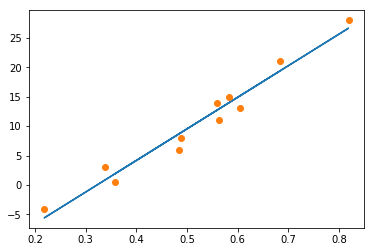

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(),'o')

In [39]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 9,  7,  5,  6,  1,  2,  0,  3, 10]), tensor([4, 8]))

In [44]:
t_u_train = t_u[train_indices] * 0.1
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices] * 0.1
t_c_val = t_c[val_indices] 


In [45]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-2
epochs = 5000
optimizer = optim.SGD([params], lr=lr)


In [46]:
for epoch in range(epochs):
    t_p_train = model(t_u_train, *params)
    
    loss_train = loss_fn(t_p_train, t_c_train)
    t_p_val = model(t_u_val,*params)
    loss_val = loss_fn(t_p_val, t_c_val)
    
    print('Epoch %d training Loss %f, Val Loss: %f' % (epoch, float(loss),float(loss_val)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
t_p = model(t_u, *params)
params

Epoch 0 training Loss 2.927654, Val Loss: 69.678619


RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.